<a href="https://colab.research.google.com/github/Apurv-Manjrekar/Exploring-Multiple-Methods-of-Detecting-and-Classifying-Credit-Card-Fraud/blob/main/Exploring_Multiple_Methods_of_Detecting_and_Classifying_Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import RocCurveDisplay
roc_curve_est = RocCurveDisplay.from_estimator
roc_curve_pred = RocCurveDisplay.from_predictions

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import matplotlib.patches as mpatches
from time import time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import collections

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, precision_recall_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, RobustScaler

# Data Analysis


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<ipython-input-5-49a235fe78e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette=colors)


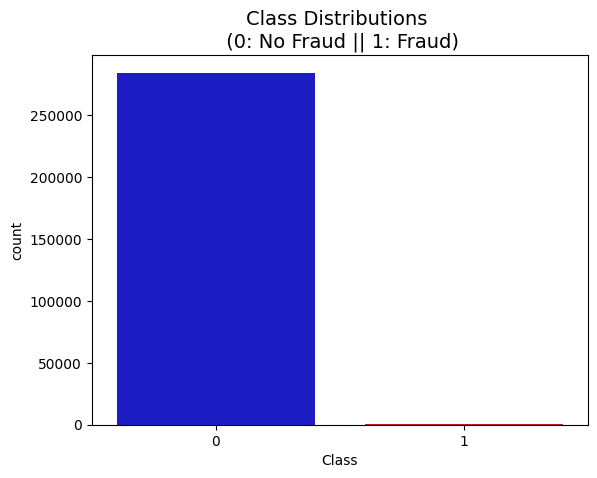

There are 284315 transactions that are NOT fraudulent. This is 99.83 % of the dataset
There are 492 transactions that ARE fraudulent. This is 0.17 % of the dataset


In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

print(f"There are {data['Class'].value_counts()[0]} transactions that are NOT fraudulent. " +
      f"This is {round(data['Class'].value_counts()[0]/len(data) * 100,2)} % of the dataset")
print(f"There are {data['Class'].value_counts()[1]} transactions that ARE fraudulent. " +
      f"This is {round(data['Class'].value_counts()[1]/len(data) * 100,2)} % of the dataset")

<ipython-input-6-867082c29db6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
<ipython-input-6-867082c29db6>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


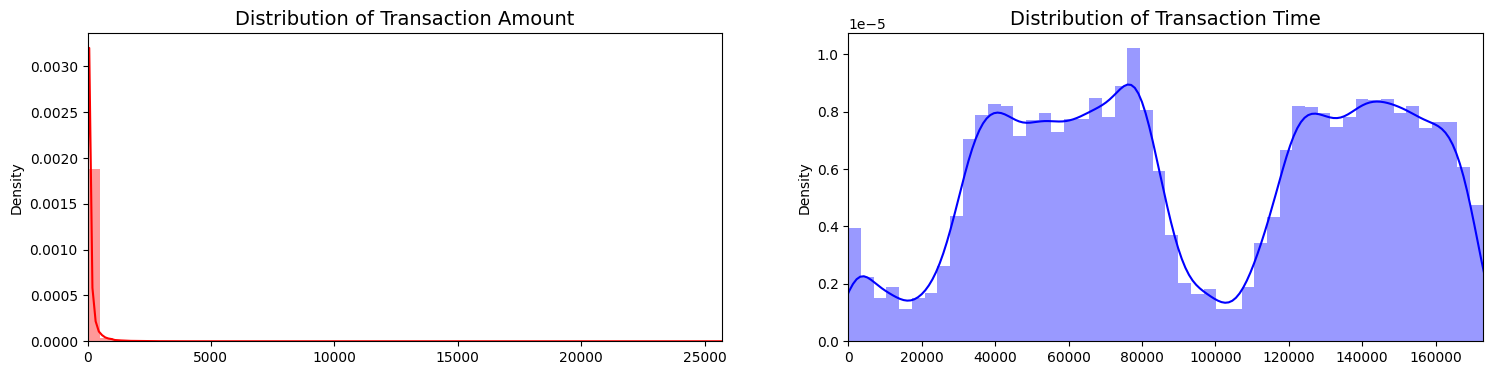

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

# Preprocessing

In [ ]:
# Scaling features
scaler = RobustScaler()
data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))
X = data.drop(['Class', 'Amount', 'Time'], axis=1)
y = data['Class']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_scaled = X_train
X_test_scaled = X_test

# Resampling using Random Under Sampler
undersampler = RandomUnderSampler(random_state=42, sampling_strategy="majority")
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_scaled, y_train)

# Resampling using Random Over Sampler
oversampler = RandomOverSampler(random_state=42, sampling_strategy="minority")
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_scaled, y_train)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.296653,1.034951
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0.038986,1.034963
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0.641096,1.034975
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.167680,1.034975


In [ ]:
X_train_resampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,1.284213,-0.501464,-0.357034,-2.105217,-0.438960,-1.008206,0.096926,-0.295436,1.930483,-1.638090,...,-0.202416,-0.393263,-0.207654,-0.405794,0.817223,-0.851350,0.059367,0.023643,0.489206,-0.173193
1,0.155404,-0.039331,-0.563432,-0.478156,0.985475,0.859321,0.577935,0.379662,0.023975,-0.401163,...,0.507181,1.405727,0.137711,-1.434481,-0.521119,-0.049328,0.049098,-0.030566,0.915671,0.761405
2,1.135878,0.029953,0.323076,1.133289,-0.174560,0.004576,-0.148293,0.061964,0.283051,0.013872,...,0.195802,0.553511,-0.213152,-0.424880,0.640881,-0.125404,0.034163,0.021453,0.302662,-0.167988
3,1.992833,0.144782,-1.618801,1.410094,0.373586,-1.152419,0.642564,-0.402493,0.258189,0.260896,...,0.056648,0.332903,-0.013404,-0.017312,0.438219,-0.490139,-0.020661,-0.059648,0.069867,0.953312
4,-0.385451,0.672831,0.987344,-0.948938,0.740487,-0.150095,1.075317,-0.279940,0.370106,-0.805037,...,0.008414,0.307288,-0.567814,0.657006,1.060964,0.270908,-0.389675,-0.300019,-0.167680,0.939767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,-11.589748,...,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,-0.286173,-0.511026
784,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,-0.135401,-0.558336
785,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,0.042228,...,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,-0.262419,0.480739
786,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,-5.110728,...,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,-0.201355,0.210682


In [ ]:
X_train_oversampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.167819,0.689153
1,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,0.333962,0.381595
2,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.139873,0.762145
3,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,1.333613,0.105476
4,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,0.052540,-0.023931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,-3.859881,2.632881,-5.264265,3.446113,-0.675231,-1.904959,-3.291041,-0.985766,-1.168114,-3.936294,...,1.664119,0.785075,0.068412,0.778961,-0.863166,-0.006810,-1.065734,1.773326,-0.290924,0.046758
454898,-10.040631,6.139183,-12.972972,7.740555,-8.684705,-3.837429,-11.907702,5.833273,-5.731054,-12.438945,...,2.823431,1.153005,-0.567343,0.843012,0.549938,0.113892,-0.307375,0.061631,-0.293440,0.108037
454899,-0.639191,-0.085595,1.265452,1.401166,-0.260542,1.009795,1.301999,-0.135258,-0.431521,-0.091353,...,0.340331,0.760170,0.353377,-0.778893,-0.070681,-0.033355,-0.061962,-0.062687,3.747363,-0.248053
454900,-0.079653,3.222010,-3.724201,6.037345,0.583395,-0.691346,-1.799885,-2.627781,-4.001338,-2.271526,...,-0.664694,1.138556,-0.350753,-0.287467,0.808889,0.823962,0.668497,0.595610,-0.293440,0.588282


# Models

In [ ]:
def plot_roc_curve(fpr_train, tpr_train, auc_train, fpr_test, tpr_test, auc_test, model_name):
    plt.figure(figsize=(8, 6))

    roc_display_train = RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=auc_train, estimator_name=f'Train Set ({model_name})')
    roc_display_train.plot(ax=plt.gca())

    roc_display_test = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=auc_test, estimator_name=f'Test Set ({model_name})')
    roc_display_test.plot(ax=plt.gca())

    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def plot_confusion_matrix_custom(model, X_train, y_train, X_test, y_test, model_name):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Confusion matrix for train set
    ax = axes[0]
    y_pred_train = model.predict(X_train)
    cm_train = confusion_matrix(y_train, y_pred_train)
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f'Train Set - Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

    # Confusion matrix for test set
    ax = axes[1]
    y_pred_test = model.predict(X_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f'Test Set - Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

    plt.show()

In [ ]:
def print_metrics(y_true, y_pred_proba, prefix):
    y_pred = (y_pred_proba >= 0.5).astype(int)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{prefix} Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    metrics_table(precision, recall, f1, prefix)
    return precision, recall, f1

In [ ]:
training_time = {}

In [ ]:
def metrics_table(precision, recall, f1, prefix):
    metrics = ["Precision", "Recall", "F1 Score"]
    scores = [precision, recall, f1]

    fig, ax = plt.subplots(figsize=(8, 2))  # Adjust the figure size as needed
    fig.subplots_adjust(top=0.8)  # Adjust the top margin to make space for the title

    # Hide axes
    ax.axis('off')

    # Create table
    table_data = []
    for i in range(len(metrics)):
        table_data.append([metrics[i], f'{scores[i]:.3f}'])

    table = ax.table(cellText=table_data, colLabels=["", "Test Set"],
                    cellLoc='center', loc='center')

    # Set font size
    table_title = table.auto_set_font_size(False)
    table_title = table.set_fontsize(14)
    table_title = ax.set_title(prefix)

    # Adjust cell heights
    table.scale(1, 1.5)

    # Show plot
    plt.show()

# Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


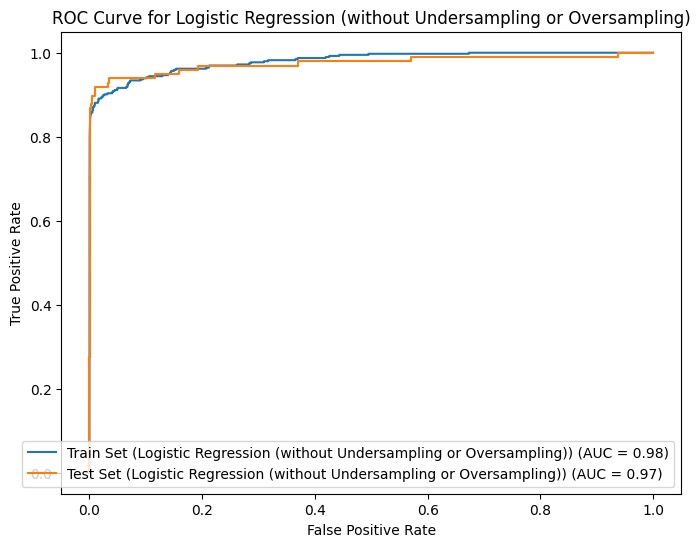

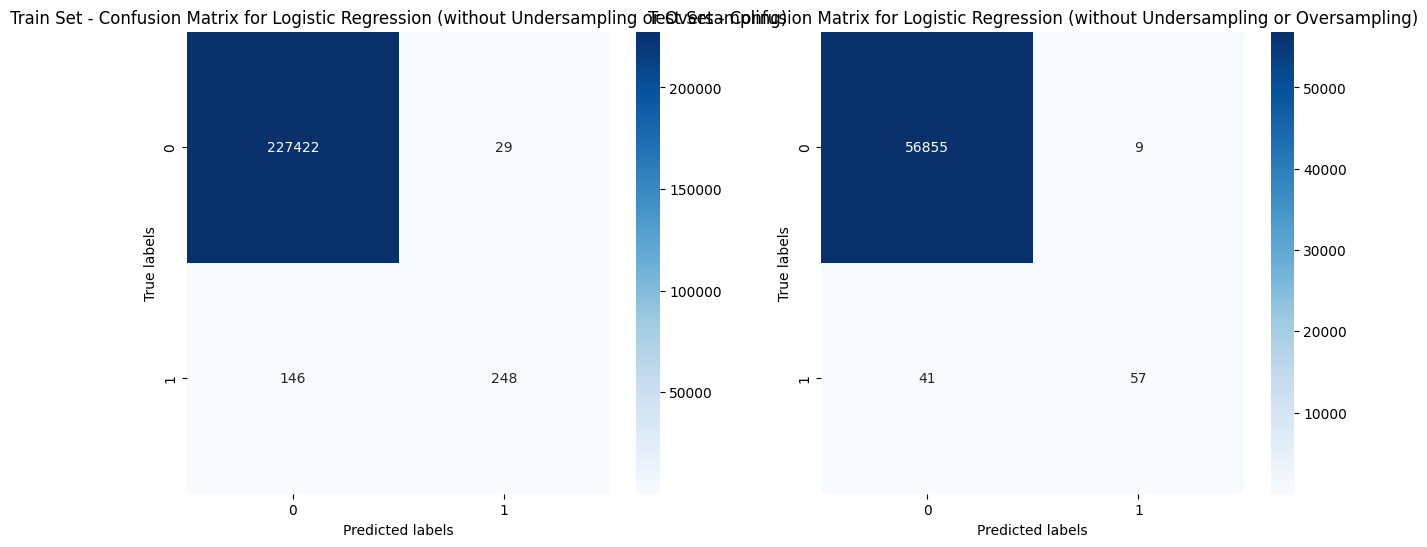

Logistic Regression (without Undersampling or Oversampling)
Logistic Regression (without Undersampling or Oversampling) Precision: 0.8636, Recall: 0.5816, F1-score: 0.6951


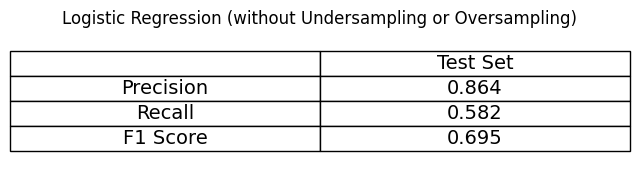

In [ ]:
# Logistic Regression without Undersampling
lr = LogisticRegression()

start_time = time()
lr.fit(X_train_scaled, y_train)
end_time = time()

training_time["Logistic Regression (without Undersampling or Oversampling)"] = end_time - start_time

y_pred_lr_train = lr.predict_proba(X_train_scaled)[:, 1]
fpr_lr_train, tpr_lr_train, _ = roc_curve(y_train, y_pred_lr_train)
auc_lr_train = auc(fpr_lr_train, tpr_lr_train)

y_pred_lr_test = lr.predict_proba(X_test_scaled)[:, 1]
fpr_lr_test, tpr_lr_test, _ = roc_curve(y_test, y_pred_lr_test)
auc_lr_test = auc(fpr_lr_test, tpr_lr_test)

plot_roc_curve(fpr_lr_train, tpr_lr_train, auc_lr_train, fpr_lr_test, tpr_lr_test, auc_lr_test, 'Logistic Regression (without Undersampling or Oversampling)')
plot_confusion_matrix_custom(lr, X_train_scaled, y_train, X_test_scaled, y_test, 'Logistic Regression (without Undersampling or Oversampling)')

print("Logistic Regression (without Undersampling or Oversampling)")
# print_metrics(y_train, y_pred_lr_train, "Train Set -")
precision_lr, recall_lr, f1_lr = print_metrics(y_test, y_pred_lr_test, "Logistic Regression (without Undersampling or Oversampling)")

In [ ]:
count = 0
for element in y_pred_lr_test:
  if element > 0.5:
    count = count + 1
print(count)
print(len(y_pred_lr_test))

66
56962


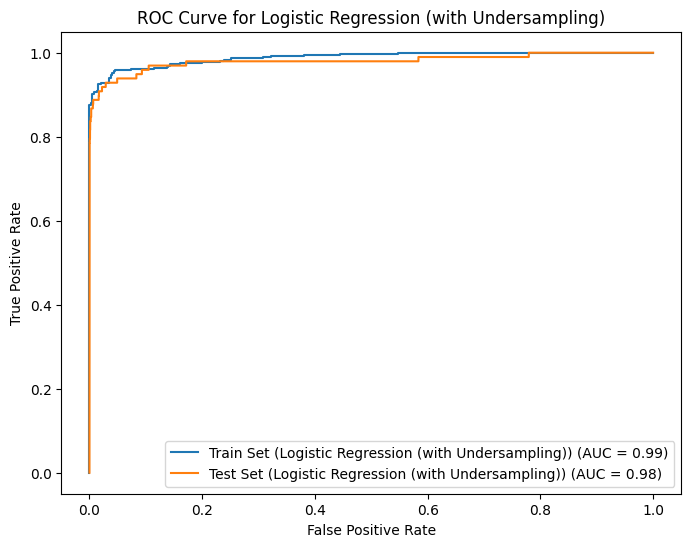

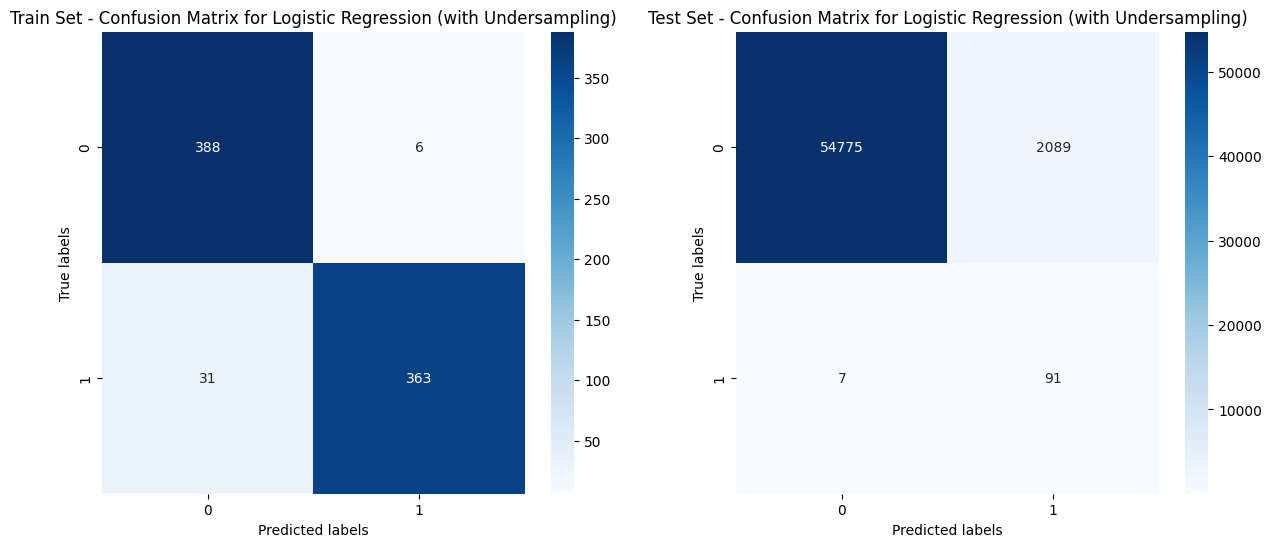

Logistic Regression (with Undersampling)
Logistic Regression (with Undersampling) Precision: 0.0417, Recall: 0.9286, F1-score: 0.0799


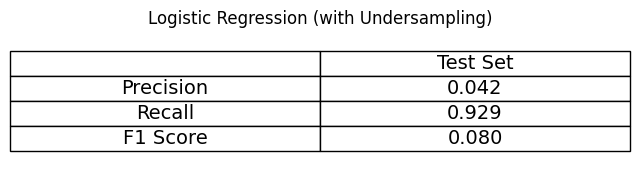

In [ ]:
# Logistic Regression with Undersampling
lr_resampled = LogisticRegression()

start_time = time()
lr_resampled.fit(X_train_resampled, y_train_resampled)
end_time = time()

training_time["Logistic Regression (with Undersampling)"] = end_time - start_time

y_pred_lr_resampled_train = lr_resampled.predict_proba(X_train_resampled)[:, 1]
fpr_lr_resampled_train, tpr_lr_resampled_train, _ = roc_curve(y_train_resampled, y_pred_lr_resampled_train)
auc_lr_resampled_train = auc(fpr_lr_resampled_train, tpr_lr_resampled_train)

y_pred_lr_resampled_test = lr_resampled.predict_proba(X_test_scaled)[:, 1]
fpr_lr_resampled_test, tpr_lr_resampled_test, _ = roc_curve(y_test, y_pred_lr_resampled_test)
auc_lr_resampled_test = auc(fpr_lr_resampled_test, tpr_lr_resampled_test)

plot_roc_curve(fpr_lr_resampled_train, tpr_lr_resampled_train, auc_lr_resampled_train, fpr_lr_resampled_test, tpr_lr_resampled_test, auc_lr_resampled_test, 'Logistic Regression (with Undersampling)')
plot_confusion_matrix_custom(lr_resampled, X_train_resampled, y_train_resampled, X_test_scaled, y_test, 'Logistic Regression (with Undersampling)')

print("Logistic Regression (with Undersampling)")
# print_metrics(y_train_resampled, y_pred_lr_resampled_train, "Train Set -")
precision_lr_resampled, recall_lr_resampled, f1_lr_resampled = print_metrics(y_test, y_pred_lr_resampled_test, "Logistic Regression (with Undersampling)")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


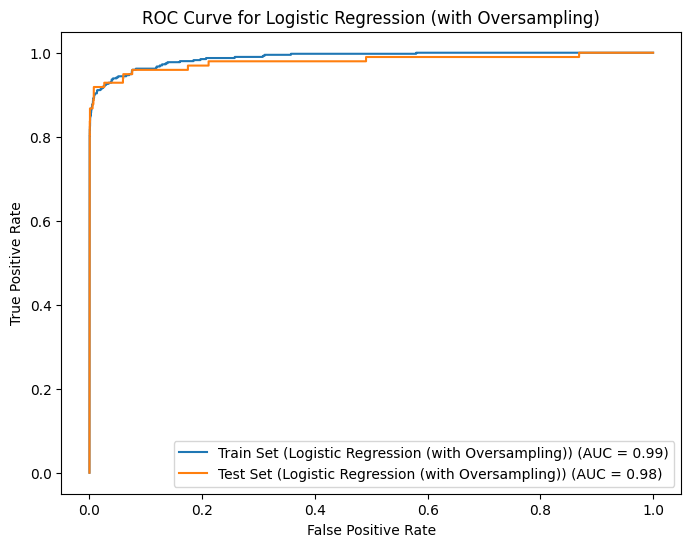

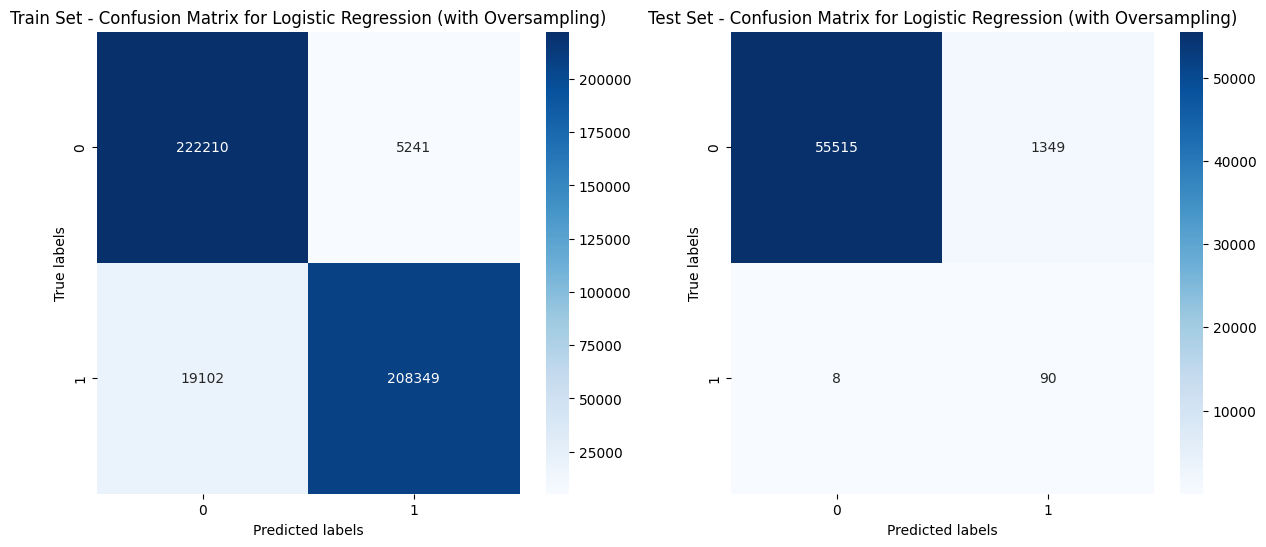

Logistic Regression (with Oversampling)
Logistic Regression (with Oversampling) Precision: 0.0625, Recall: 0.9184, F1-score: 0.1171


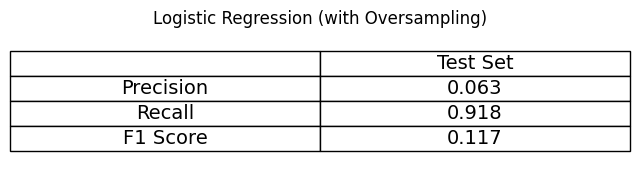

In [ ]:
# Logistic Regression with Oversampling
lr_oversampled = LogisticRegression()

start_time = time()
lr_oversampled.fit(X_train_oversampled, y_train_oversampled)
end_time = time()

training_time["Logistic Regression (with Oversampling)"] = end_time - start_time

y_pred_lr_oversampled_train = lr_oversampled.predict_proba(X_train_oversampled)[:, 1]
fpr_lr_oversampled_train, tpr_lr_oversampled_train, _ = roc_curve(y_train_oversampled, y_pred_lr_oversampled_train)
auc_lr_oversampled_train = auc(fpr_lr_oversampled_train, tpr_lr_oversampled_train)

y_pred_lr_oversampled_test = lr_oversampled.predict_proba(X_test_scaled)[:, 1]
fpr_lr_oversampled_test, tpr_lr_oversampled_test, _ = roc_curve(y_test, y_pred_lr_oversampled_test)
auc_lr_oversampled_test = auc(fpr_lr_oversampled_test, tpr_lr_oversampled_test)

plot_roc_curve(fpr_lr_oversampled_train, tpr_lr_oversampled_train, auc_lr_oversampled_train, fpr_lr_oversampled_test, tpr_lr_oversampled_test, auc_lr_oversampled_test, 'Logistic Regression (with Oversampling)')
plot_confusion_matrix_custom(lr_oversampled, X_train_oversampled, y_train_oversampled, X_test_scaled, y_test, 'Logistic Regression (with Oversampling)')

print("Logistic Regression (with Oversampling)")
# print_metrics(y_train_oversampled, y_pred_lr_oversampled_train, "Train Set -")
precision_lr_oversampled, recall_lr_oversampled, f1_lr_oversampled = print_metrics(y_test, y_pred_lr_oversampled_test, "Logistic Regression (with Oversampling)")

# Decision Tree

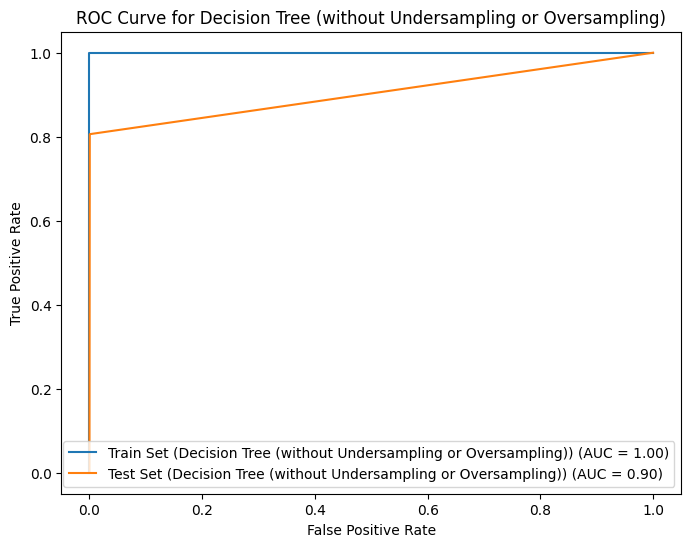

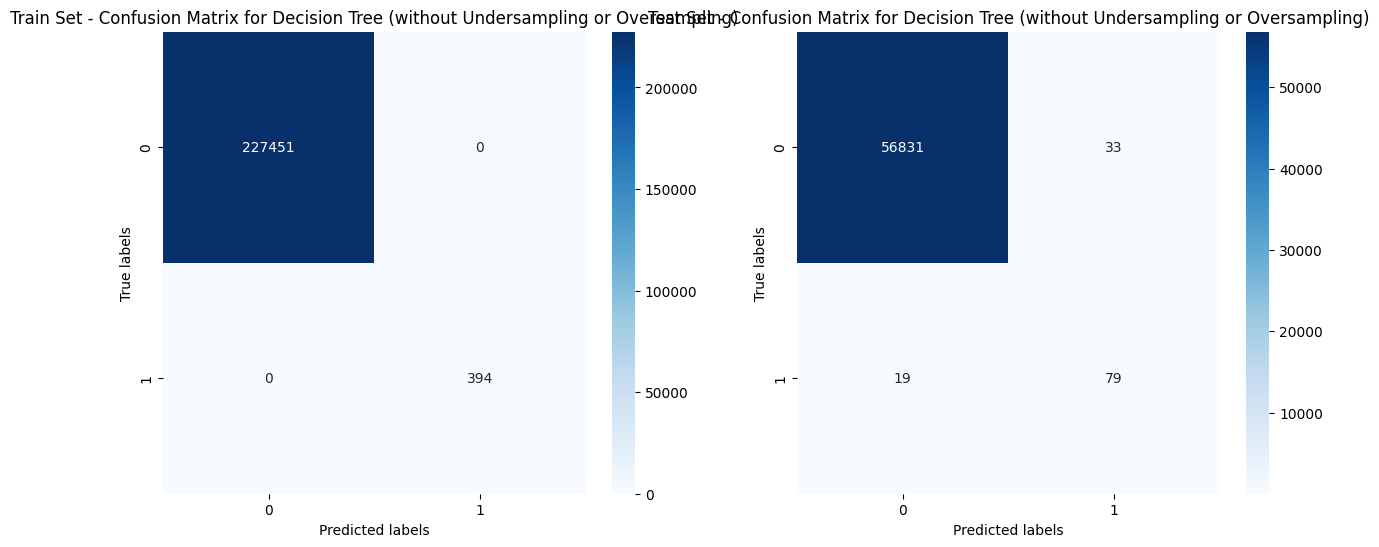

Decision Tree (without Undersampling or Oversampling)
Decision Tree (without Undersampling or Oversampling) Precision: 0.7054, Recall: 0.8061, F1-score: 0.7524


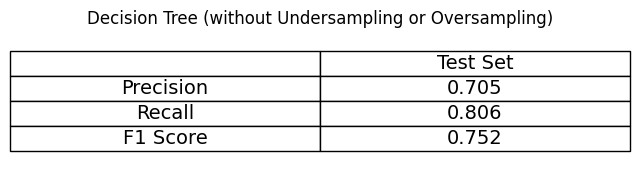

In [ ]:
# Decision Tree without Undersampling
dt = DecisionTreeClassifier()

start_time = time()
dt.fit(X_train_scaled, y_train)
end_time = time()

training_time["Decision Tree (without Undersampling or Oversampling)"] = end_time - start_time

y_pred_dt_train = dt.predict_proba(X_train_scaled)[:, 1]
fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, y_pred_dt_train)
auc_dt_train = auc(fpr_dt_train, tpr_dt_train)

y_pred_dt_test = dt.predict_proba(X_test_scaled)[:, 1]
fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, y_pred_dt_test)
auc_dt_test = auc(fpr_dt_test, tpr_dt_test)

plot_roc_curve(fpr_dt_train, tpr_dt_train, auc_dt_train, fpr_dt_test, tpr_dt_test, auc_dt_test, 'Decision Tree (without Undersampling or Oversampling)')
plot_confusion_matrix_custom(dt, X_train_scaled, y_train, X_test_scaled, y_test, 'Decision Tree (without Undersampling or Oversampling)')

print("Decision Tree (without Undersampling or Oversampling)")
# print_metrics(y_train, y_pred_dt_train, "Train Set -")
precision_dt, recall_dt, f1_dt = print_metrics(y_test, y_pred_dt_test, "Decision Tree (without Undersampling or Oversampling)")

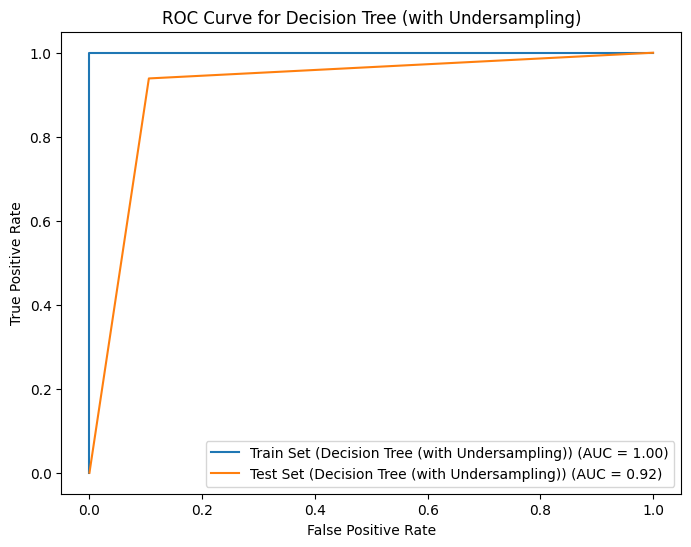

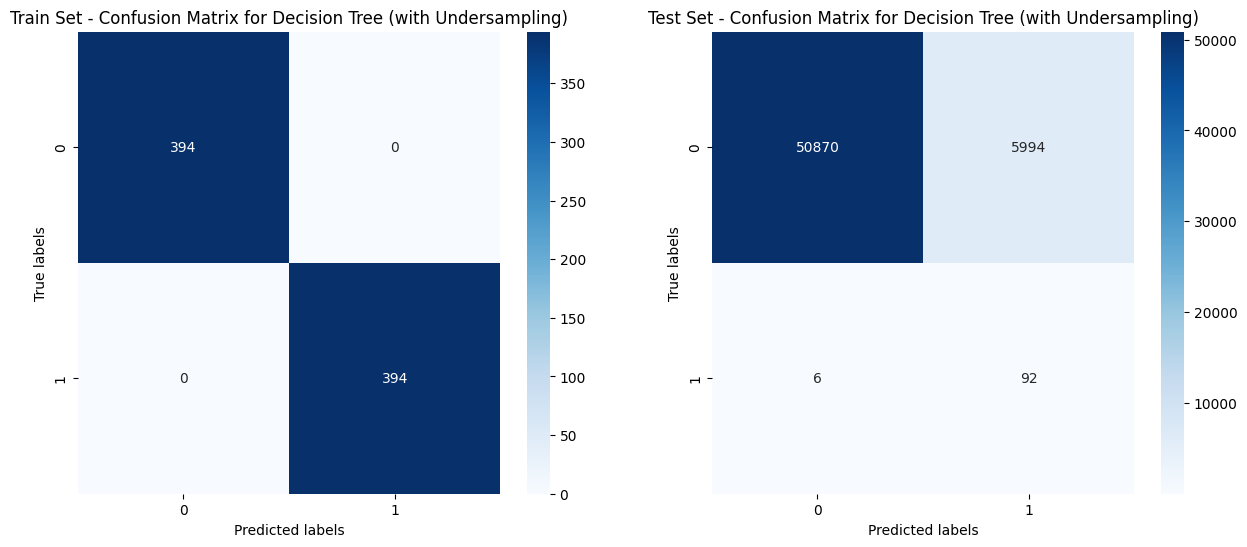

Decision Tree (with Undersampling)
Decision Tree (with Undersampling) Precision: 0.0151, Recall: 0.9388, F1-score: 0.0298


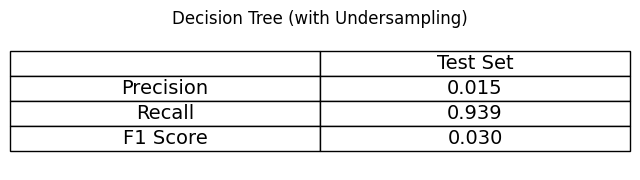

In [ ]:
# Decision Tree with Undersampling
dt_resampled = DecisionTreeClassifier()

start_time = time()
dt_resampled.fit(X_train_resampled, y_train_resampled)
end_time = time()

training_time["Decision Tree (with Undersampling)"] = end_time - start_time

y_pred_dt_resampled_train = dt_resampled.predict_proba(X_train_resampled)[:, 1]
fpr_dt_resampled_train, tpr_dt_resampled_train, _ = roc_curve(y_train_resampled, y_pred_dt_resampled_train)
auc_dt_resampled_train = auc(fpr_dt_resampled_train, tpr_dt_resampled_train)

y_pred_dt_resampled_test = dt_resampled.predict_proba(X_test_scaled)[:, 1]
fpr_dt_resampled_test, tpr_dt_resampled_test, _ = roc_curve(y_test, y_pred_dt_resampled_test)
auc_dt_resampled_test = auc(fpr_dt_resampled_test, tpr_dt_resampled_test)

plot_roc_curve(fpr_dt_resampled_train, tpr_dt_resampled_train, auc_dt_resampled_train, fpr_dt_resampled_test, tpr_dt_resampled_test, auc_dt_resampled_test, 'Decision Tree (with Undersampling)')
plot_confusion_matrix_custom(dt_resampled, X_train_resampled, y_train_resampled, X_test_scaled, y_test, 'Decision Tree (with Undersampling)')

print("Decision Tree (with Undersampling)")
# print_metrics(y_train_resampled, y_pred_dt_resampled_train, "Train Set -")
precision_dt_resampled, recall_dt_resampled, f1_dt_resampled = print_metrics(y_test, y_pred_dt_resampled_test, "Decision Tree (with Undersampling)")

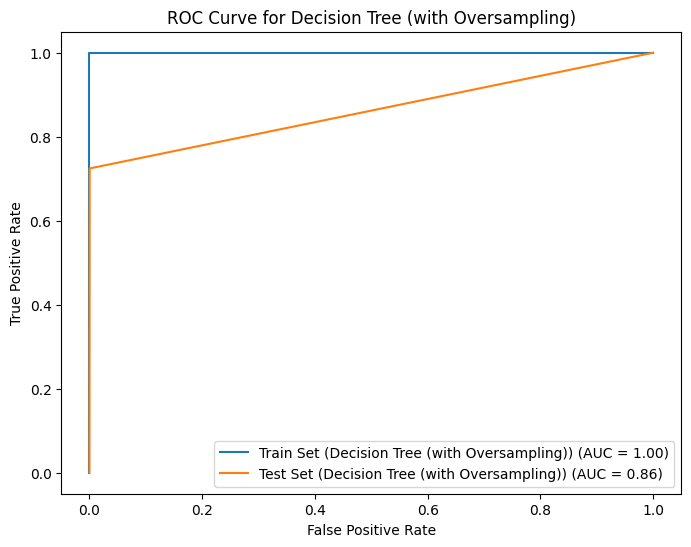

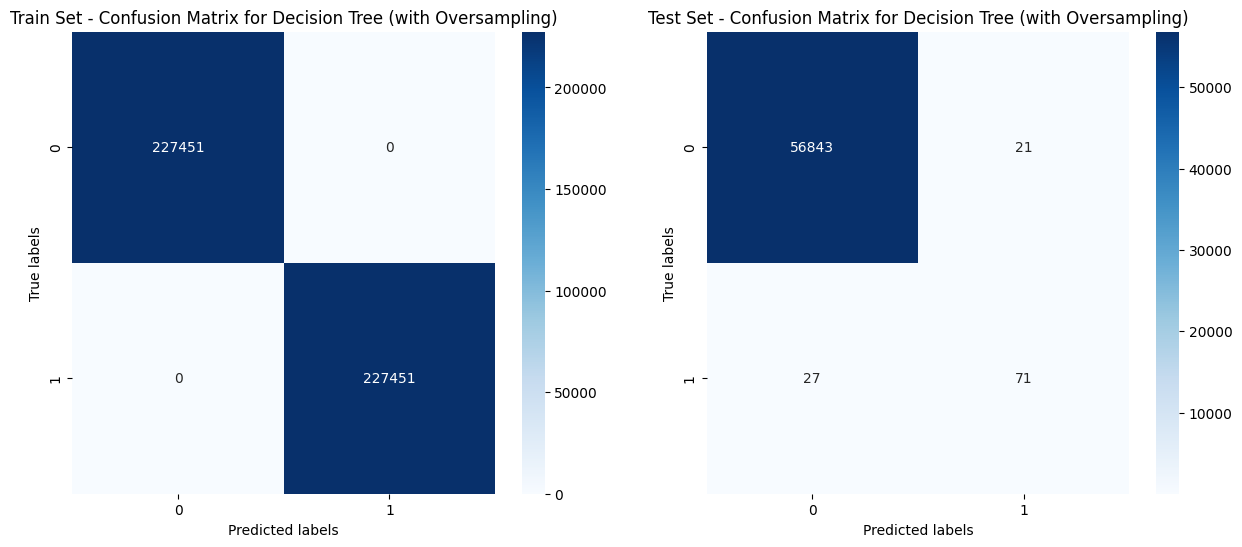

Decision Tree (with Oversampling)
Decision Tree (with Oversampling) Precision: 0.7717, Recall: 0.7245, F1-score: 0.7474


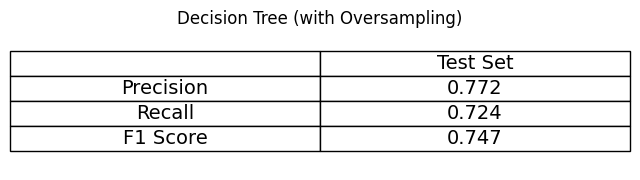

In [ ]:
# Decision Tree with Oversampling
dt_oversampled = DecisionTreeClassifier()

start_time = time()
dt_oversampled.fit(X_train_oversampled, y_train_oversampled)
end_time = time()

training_time["Decision Tree (with Oversampling)"] = end_time - start_time

y_pred_dt_oversampled_train = dt_oversampled.predict_proba(X_train_oversampled)[:, 1]
fpr_dt_oversampled_train, tpr_dt_oversampled_train, _ = roc_curve(y_train_oversampled, y_pred_dt_oversampled_train)
auc_dt_oversampled_train = auc(fpr_dt_oversampled_train, tpr_dt_oversampled_train)

y_pred_dt_oversampled_test = dt_oversampled.predict_proba(X_test_scaled)[:, 1]
fpr_dt_oversampled_test, tpr_dt_oversampled_test, _ = roc_curve(y_test, y_pred_dt_oversampled_test)
auc_dt_oversampled_test = auc(fpr_dt_oversampled_test, tpr_dt_oversampled_test)

plot_roc_curve(fpr_dt_oversampled_train, tpr_dt_oversampled_train, auc_dt_oversampled_train, fpr_dt_oversampled_test, tpr_dt_oversampled_test, auc_dt_oversampled_test, 'Decision Tree (with Oversampling)')
plot_confusion_matrix_custom(dt_oversampled, X_train_oversampled, y_train_oversampled, X_test_scaled, y_test, 'Decision Tree (with Oversampling)')

print("Decision Tree (with Oversampling)")
# print_metrics(y_train_oversampled, y_pred_dt_oversampled_train, "Train Set -")
precision_dt_oversampled, recall_dt_oversampled, f1_dt_oversampled = print_metrics(y_test, y_pred_dt_oversampled_test, "Decision Tree (with Oversampling)")

# Random Forest

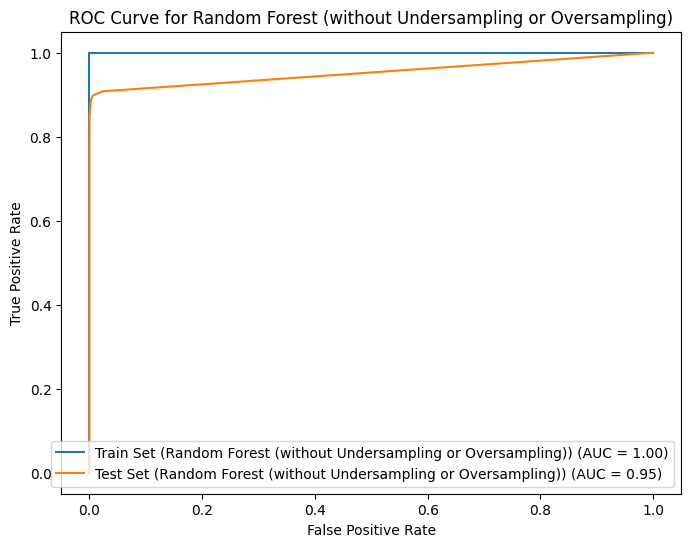

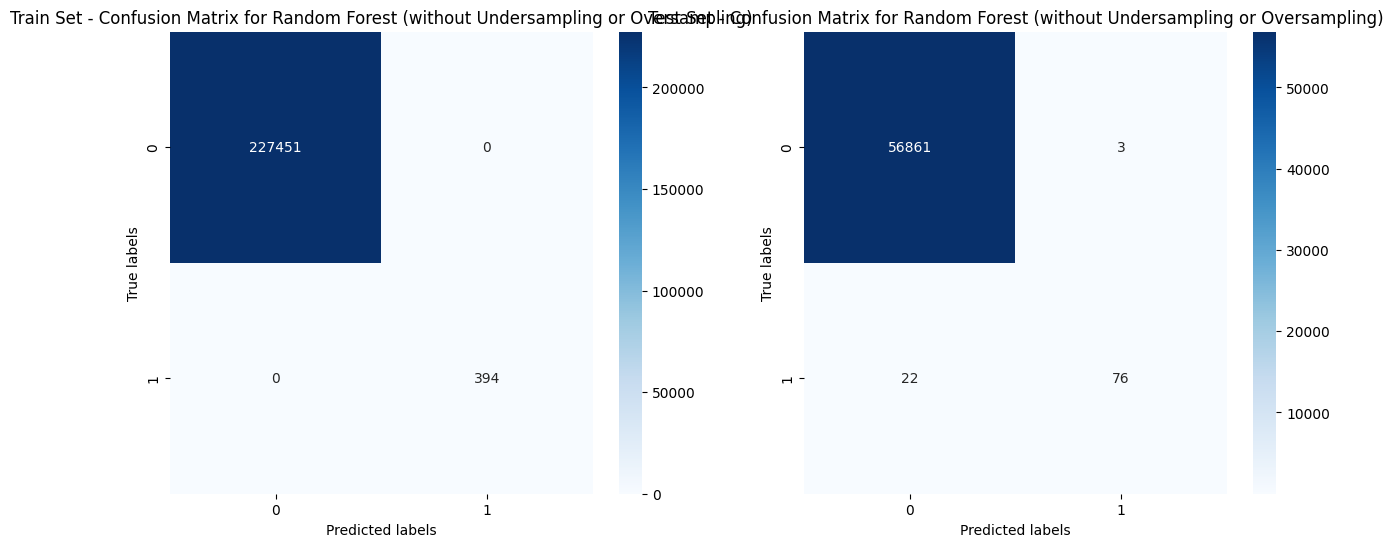

Random Forest (without Undersampling or Oversampling)
Random Forest (without Undersampling or Oversampling) Precision: 0.9620, Recall: 0.7755, F1-score: 0.8588


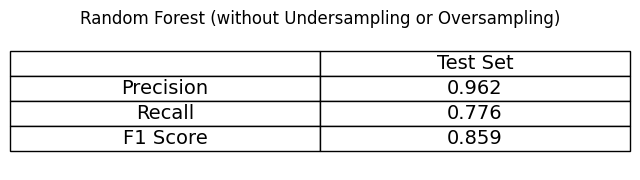

In [ ]:
# Random Forest without Undersampling
rf = RandomForestClassifier()

start_time = time()
rf.fit(X_train_scaled, y_train)
end_time = time()

training_time["Random Forest (without Undersampling or Oversampling)"] = end_time - start_time

y_pred_rf_train = rf.predict_proba(X_train_scaled)[:, 1]
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_pred_rf_train)
auc_rf_train = auc(fpr_rf_train, tpr_rf_train)

y_pred_rf_test = rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_pred_rf_test)
auc_rf_test = auc(fpr_rf_test, tpr_rf_test)

plot_roc_curve(fpr_rf_train, tpr_rf_train, auc_rf_train, fpr_rf_test, tpr_rf_test, auc_rf_test, 'Random Forest (without Undersampling or Oversampling)')
plot_confusion_matrix_custom(rf, X_train_scaled, y_train, X_test_scaled, y_test, 'Random Forest (without Undersampling or Oversampling)')

print("Random Forest (without Undersampling or Oversampling)")
# print_metrics(y_train, y_pred_rf_train, "Train Set -")
precision_rf, recall_rf, f1_rf = print_metrics(y_test, y_pred_rf_test, "Random Forest (without Undersampling or Oversampling)")

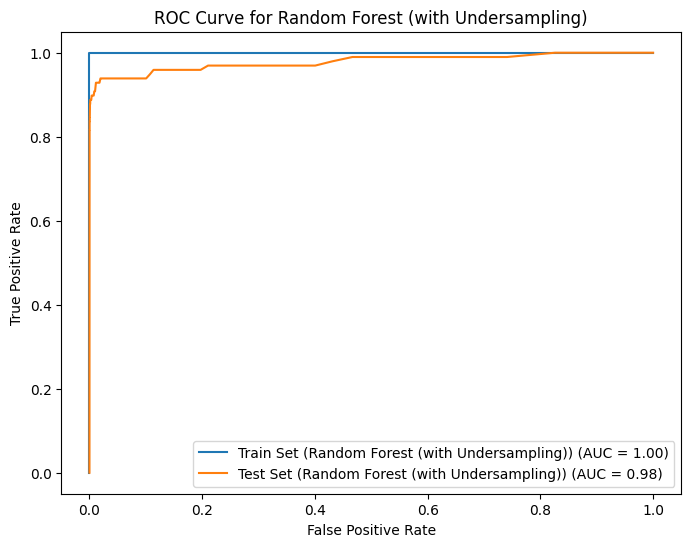

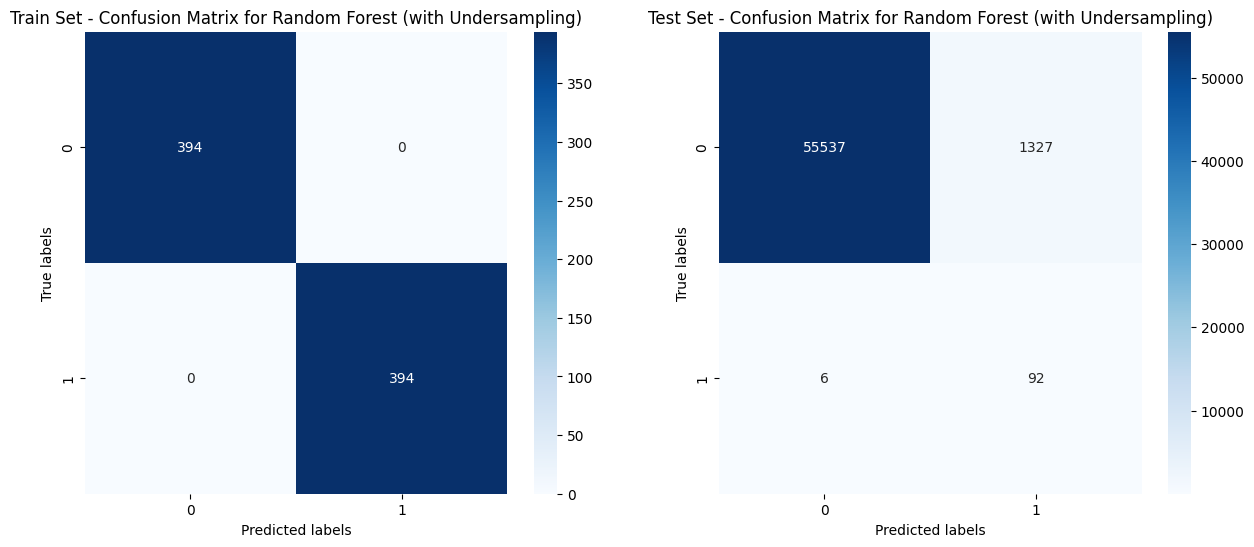

Random Forest (with Undersampling)
Random Forest (with Undersampling) Precision: 0.0586, Recall: 0.9388, F1-score: 0.1103


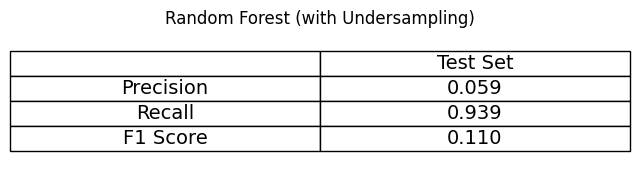

In [ ]:
# Random Forest with Undersampling
rf_resampled = RandomForestClassifier()

start_time = time()
rf_resampled.fit(X_train_resampled, y_train_resampled)
end_time = time()

training_time["Random Forest (with Undersampling)"] = end_time - start_time

y_pred_rf_resampled_train = rf_resampled.predict_proba(X_train_resampled)[:, 1]
fpr_rf_resampled_train, tpr_rf_resampled_train, _ = roc_curve(y_train_resampled, y_pred_rf_resampled_train)
auc_rf_resampled_train = auc(fpr_rf_resampled_train, tpr_rf_resampled_train)

y_pred_rf_resampled_test = rf_resampled.predict_proba(X_test_scaled)[:, 1]
fpr_rf_resampled_test, tpr_rf_resampled_test, _ = roc_curve(y_test, y_pred_rf_resampled_test)
auc_rf_resampled_test = auc(fpr_rf_resampled_test, tpr_rf_resampled_test)

plot_roc_curve(fpr_rf_resampled_train, tpr_rf_resampled_train, auc_rf_resampled_train, fpr_rf_resampled_test, tpr_rf_resampled_test, auc_rf_resampled_test, 'Random Forest (with Undersampling)')
plot_confusion_matrix_custom(rf_resampled, X_train_resampled, y_train_resampled, X_test_scaled, y_test, 'Random Forest (with Undersampling)')

print("Random Forest (with Undersampling)")
# print_metrics(y_train_resampled, y_pred_rf_resampled_train, "Train Set -")
precision_rf_resampled, recall_rf_resampled, f1_rf_resampled = print_metrics(y_test, y_pred_rf_resampled_test, "Random Forest (with Undersampling)")

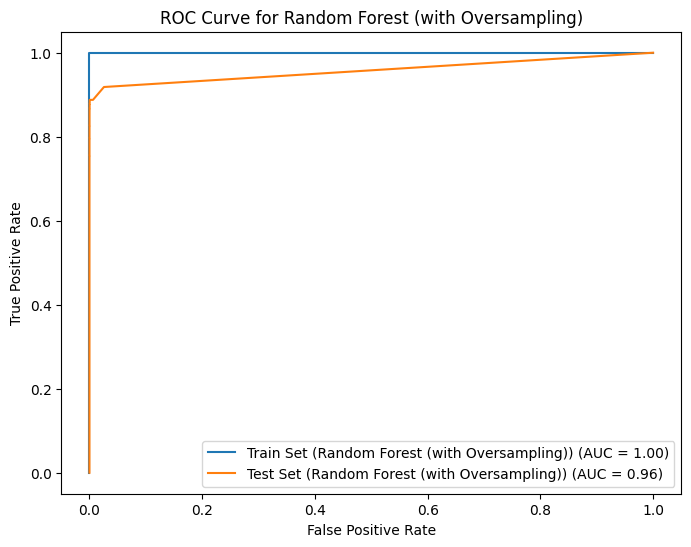

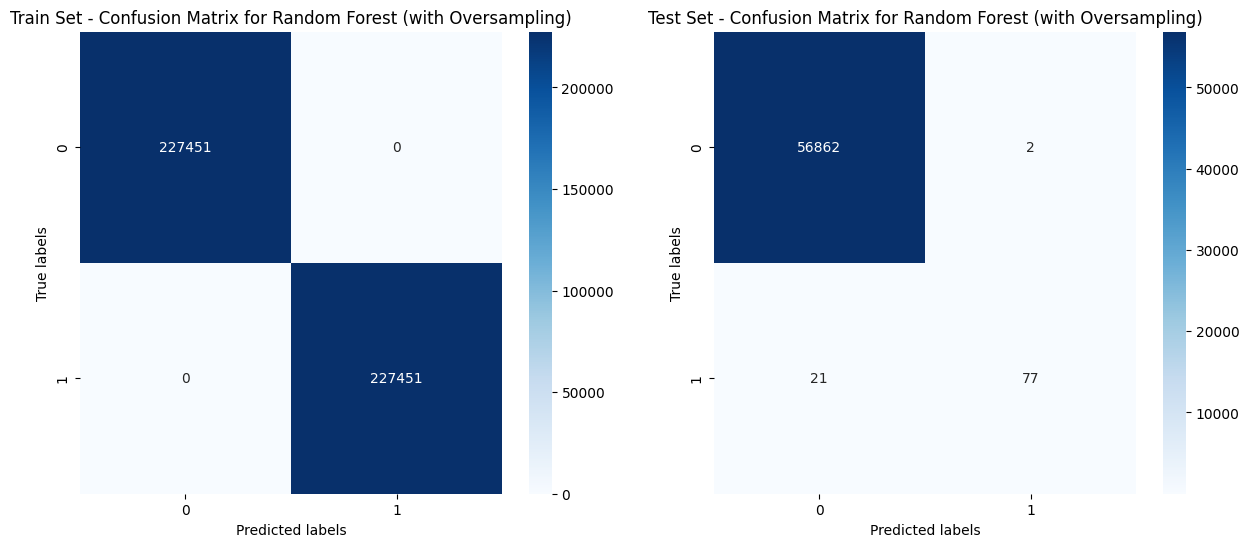

Random Forest (with Oversampling)
Random Forest (with Oversampling) Precision: 0.9747, Recall: 0.7857, F1-score: 0.8701


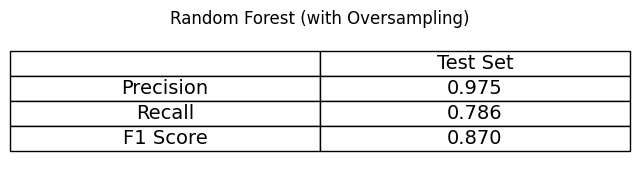

In [ ]:
# Random Forest with Oversampling
rf_oversampled = RandomForestClassifier()

start_time = time()
rf_oversampled.fit(X_train_oversampled, y_train_oversampled)
end_time = time()

training_time["Random Forest (with Oversampling)"] = end_time - start_time

y_pred_rf_oversampled_train = rf_oversampled.predict_proba(X_train_oversampled)[:, 1]
fpr_rf_oversampled_train, tpr_rf_oversampled_train, _ = roc_curve(y_train_oversampled, y_pred_rf_oversampled_train)
auc_rf_oversampled_train = auc(fpr_rf_oversampled_train, tpr_rf_oversampled_train)

y_pred_rf_oversampled_test = rf_oversampled.predict_proba(X_test_scaled)[:, 1]
fpr_rf_oversampled_test, tpr_rf_oversampled_test, _ = roc_curve(y_test, y_pred_rf_oversampled_test)
auc_rf_oversampled_test = auc(fpr_rf_oversampled_test, tpr_rf_oversampled_test)

plot_roc_curve(fpr_rf_oversampled_train, tpr_rf_oversampled_train, auc_rf_oversampled_train, fpr_rf_oversampled_test, tpr_rf_oversampled_test, auc_rf_oversampled_test, 'Random Forest (with Oversampling)')
plot_confusion_matrix_custom(rf_oversampled, X_train_oversampled, y_train_oversampled, X_test_scaled, y_test, 'Random Forest (with Oversampling)')

print("Random Forest (with Oversampling)")
# print_metrics(y_train_oversampled, y_pred_rf_oversampled_train, "Train Set -")
precision_rf_oversampled, recall_rf_oversampled, f1_rf_oversampled = print_metrics(y_test, y_pred_rf_oversampled_test, "Random Forest (with Oversampling)")

# Gradient Boosting

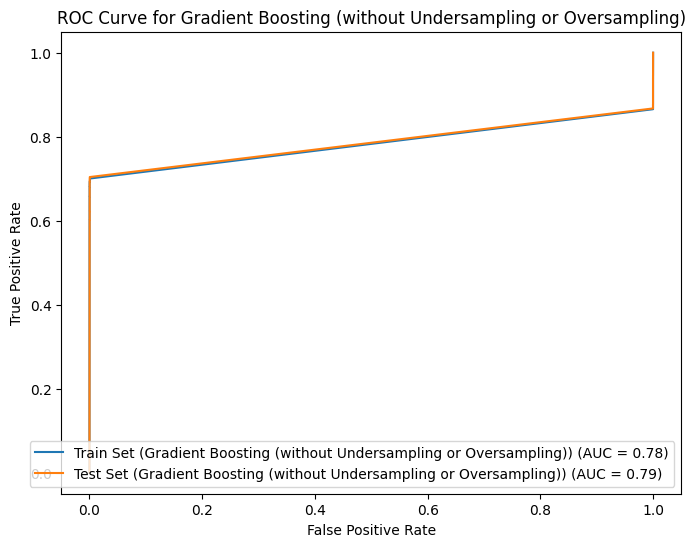

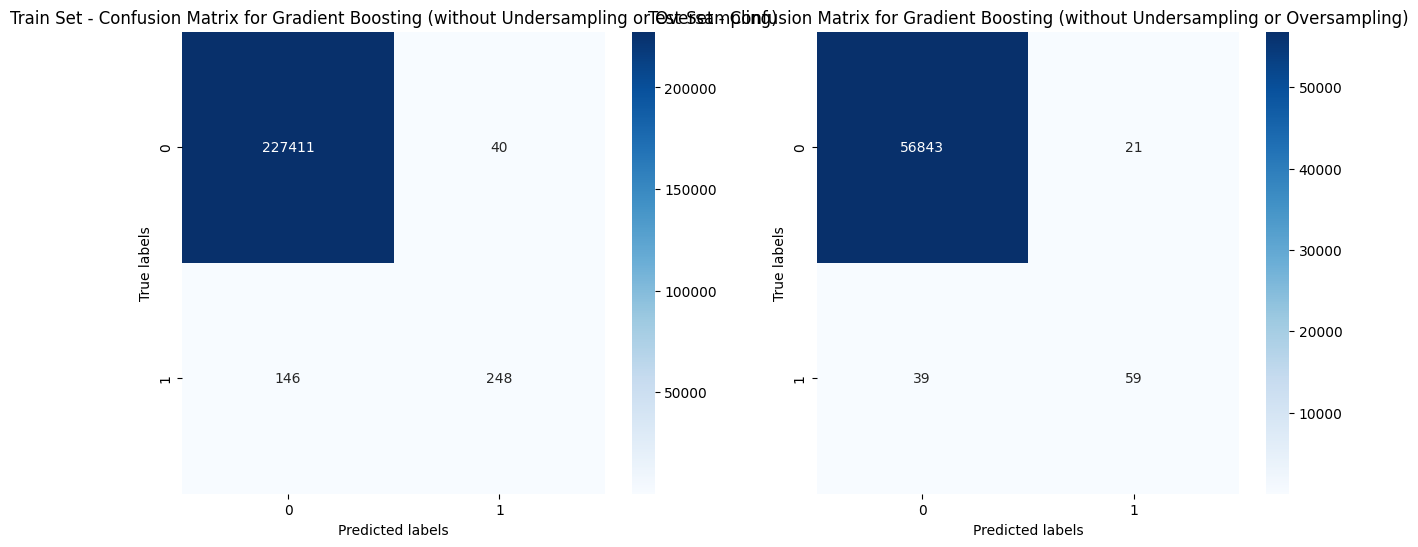

Gradient Boosting (without Undersampling or Oversampling)
Gradient Boosting (without Undersampling or Oversampling) Precision: 0.7375, Recall: 0.6020, F1-score: 0.6629


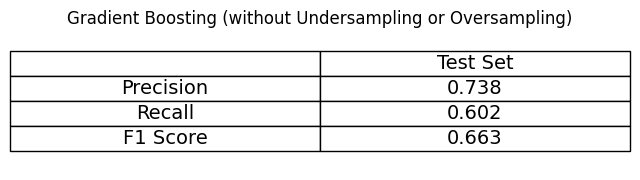

In [ ]:
# Gradient Boosting without Undersampling
gb = GradientBoostingClassifier()

start_time = time()
gb.fit(X_train_scaled, y_train)
end_time = time()

training_time["Gradient Boosting (without Undersampling or Oversampling)"] = end_time - start_time

y_pred_gb_train = gb.predict_proba(X_train_scaled)[:, 1]
fpr_gb_train, tpr_gb_train, _ = roc_curve(y_train, y_pred_gb_train)
auc_gb_train = auc(fpr_gb_train, tpr_gb_train)

y_pred_gb_test = gb.predict_proba(X_test_scaled)[:, 1]
fpr_gb_test, tpr_gb_test, _ = roc_curve(y_test, y_pred_gb_test)
auc_gb_test = auc(fpr_gb_test, tpr_gb_test)

plot_roc_curve(fpr_gb_train, tpr_gb_train, auc_gb_train, fpr_gb_test, tpr_gb_test, auc_gb_test, 'Gradient Boosting (without Undersampling or Oversampling)')
plot_confusion_matrix_custom(gb, X_train_scaled, y_train, X_test_scaled, y_test, 'Gradient Boosting (without Undersampling or Oversampling)')

print("Gradient Boosting (without Undersampling or Oversampling)")
# print_metrics(y_train, y_pred_gb_train, "Train Set -")
precision_gb, recall_gb, f1_gb = print_metrics(y_test, y_pred_gb_test, "Gradient Boosting (without Undersampling or Oversampling)")

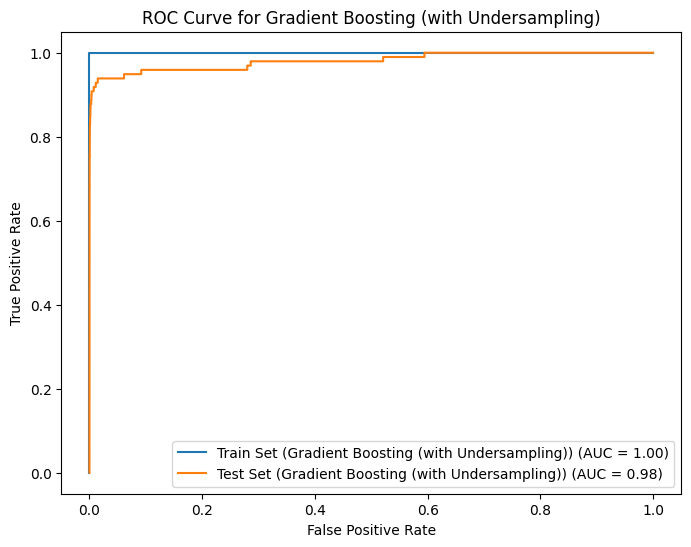

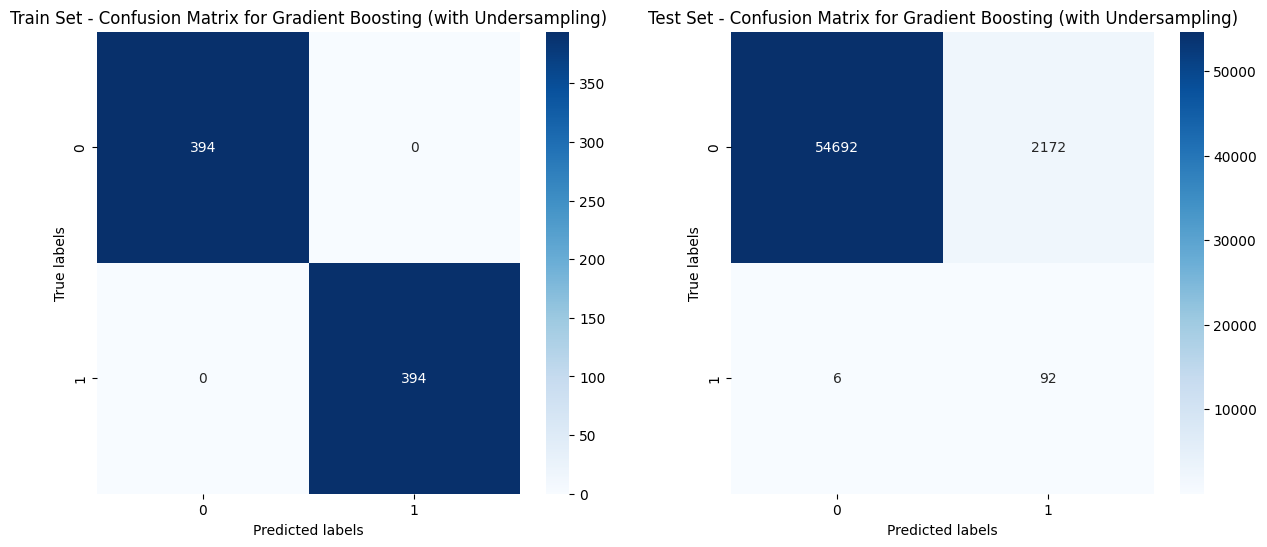

Gradient Boosting (with Undersampling)
Gradient Boosting (with Undersampling) Precision: 0.0406, Recall: 0.9388, F1-score: 0.0779


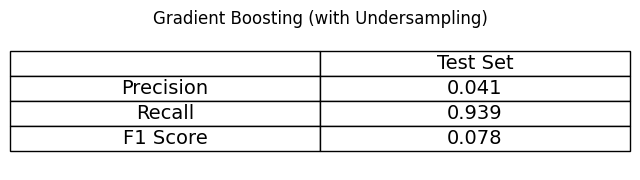

In [ ]:
# Gradient Boosting with Undersampling
gb_resampled = GradientBoostingClassifier()

start_time = time()
gb_resampled.fit(X_train_resampled, y_train_resampled)
end_time = time()

training_time["Gradient Boosting (with Undersampling)"] = end_time - start_time

y_pred_gb_resampled_train = gb_resampled.predict_proba(X_train_resampled)[:, 1]
fpr_gb_resampled_train, tpr_gb_resampled_train, _ = roc_curve(y_train_resampled, y_pred_gb_resampled_train)
auc_gb_resampled_train = auc(fpr_gb_resampled_train, tpr_gb_resampled_train)

y_pred_gb_resampled_test = gb_resampled.predict_proba(X_test_scaled)[:, 1]
fpr_gb_resampled_test, tpr_gb_resampled_test, _ = roc_curve(y_test, y_pred_gb_resampled_test)
auc_gb_resampled_test = auc(fpr_gb_resampled_test, tpr_gb_resampled_test)

plot_roc_curve(fpr_gb_resampled_train, tpr_gb_resampled_train, auc_gb_resampled_train, fpr_gb_resampled_test, tpr_gb_resampled_test, auc_gb_resampled_test, 'Gradient Boosting (with Undersampling)')
plot_confusion_matrix_custom(gb_resampled, X_train_resampled, y_train_resampled, X_test_scaled, y_test, 'Gradient Boosting (with Undersampling)')

print("Gradient Boosting (with Undersampling)")
# print_metrics(y_train_resampled, y_pred_gb_resampled_train, "Train Set -")
precision_gb_resampled, recall_gb_resampled, f1_gb_resampled = print_metrics(y_test, y_pred_gb_resampled_test, "Gradient Boosting (with Undersampling)")

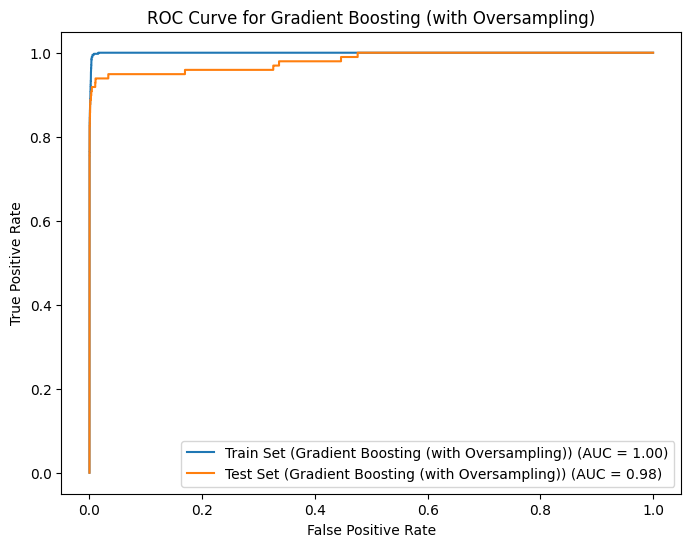

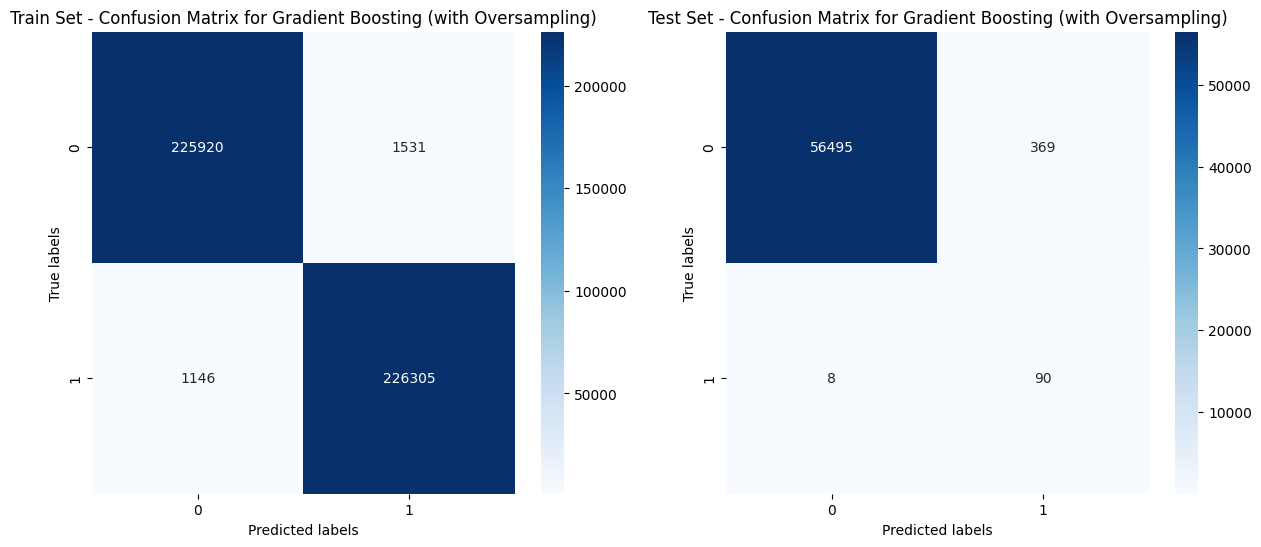

Gradient Boosting (with Oversampling)
Gradient Boosting (with Oversampling) Precision: 0.1961, Recall: 0.9184, F1-score: 0.3232


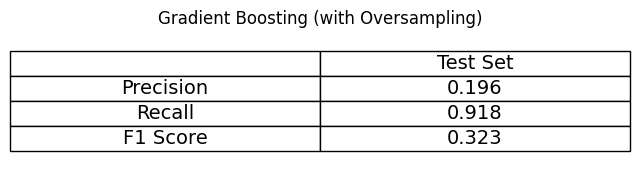

In [ ]:
# Gradient Boosting with Oversampling
gb_oversampled = GradientBoostingClassifier()

start_time = time()
gb_oversampled.fit(X_train_oversampled, y_train_oversampled)
end_time = time()

training_time["Gradient Boosting (with Oversampling)"] = end_time - start_time

y_pred_gb_oversampled_train = gb_oversampled.predict_proba(X_train_oversampled)[:, 1]
fpr_gb_oversampled_train, tpr_gb_oversampled_train, _ = roc_curve(y_train_oversampled, y_pred_gb_oversampled_train)
auc_gb_oversampled_train = auc(fpr_gb_oversampled_train, tpr_gb_oversampled_train)

y_pred_gb_oversampled_test = gb_oversampled.predict_proba(X_test_scaled)[:, 1]
fpr_gb_oversampled_test, tpr_gb_oversampled_test, _ = roc_curve(y_test, y_pred_gb_oversampled_test)
auc_gb_oversampled_test = auc(fpr_gb_oversampled_test, tpr_gb_oversampled_test)

plot_roc_curve(fpr_gb_oversampled_train, tpr_gb_oversampled_train, auc_gb_oversampled_train, fpr_gb_oversampled_test, tpr_gb_oversampled_test, auc_gb_oversampled_test, 'Gradient Boosting (with Oversampling)')
plot_confusion_matrix_custom(gb_oversampled, X_train_oversampled, y_train_oversampled, X_test_scaled, y_test, 'Gradient Boosting (with Oversampling)')

print("Gradient Boosting (with Oversampling)")
# print_metrics(y_train_oversampled, y_pred_gb_oversampled_train, "Train Set -")
precision_gb_oversampled, recall_gb_oversampled, f1_gb_oversampled = print_metrics(y_test, y_pred_gb_oversampled_test, "Gradient Boosting (with Oversampling)")

# Combined Plot

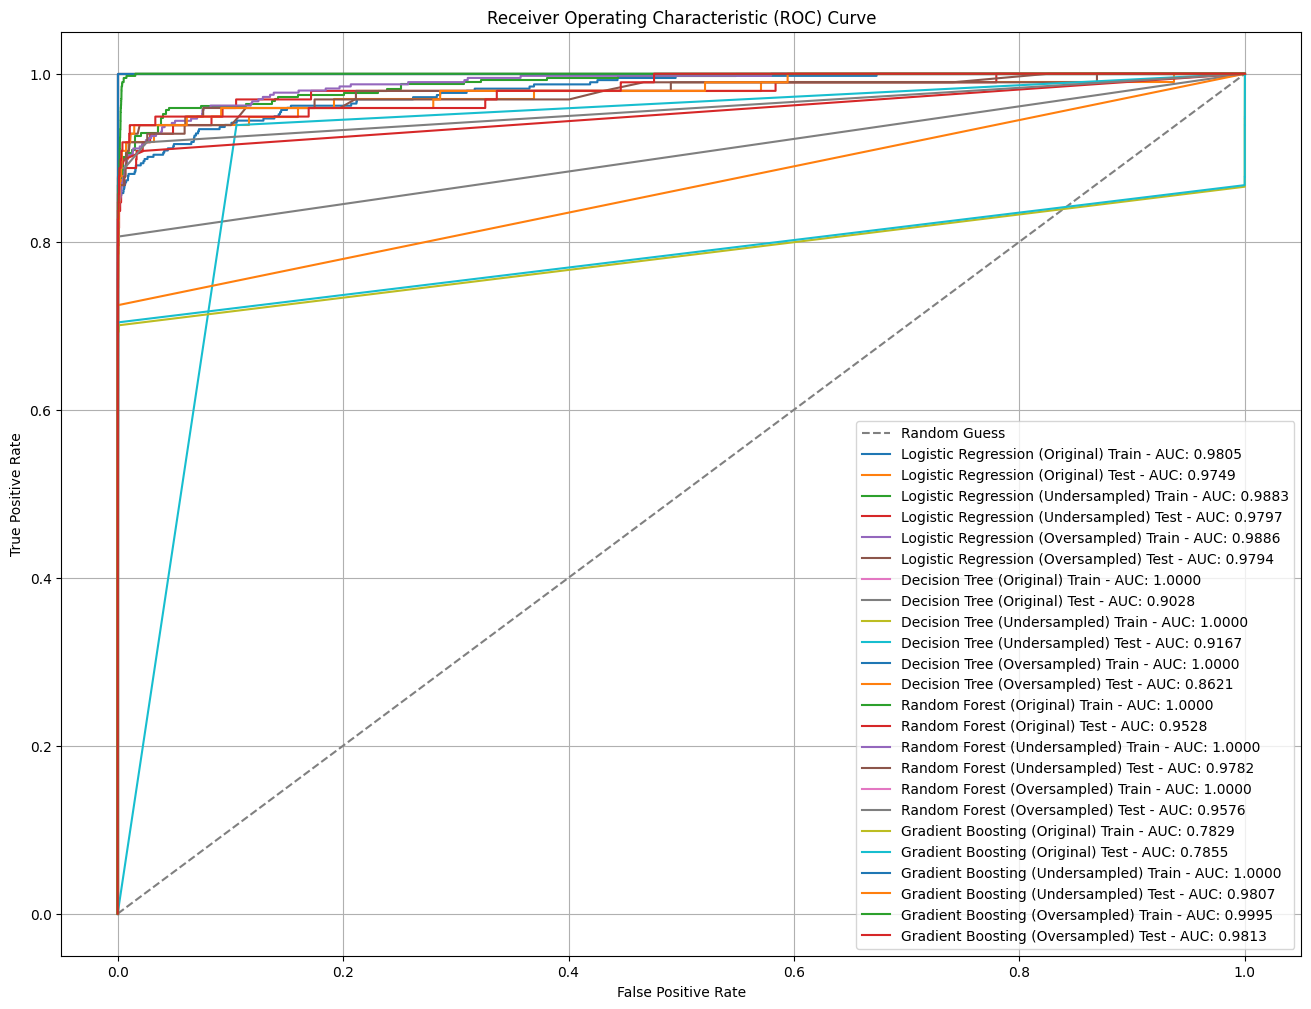

In [ ]:
plt.figure(figsize=(16, 12))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess', color='gray')

plt.plot(fpr_lr_train, tpr_lr_train, label=f'Logistic Regression (Original) Train - AUC: {auc_lr_train:.4f}')
plt.plot(fpr_lr_test, tpr_lr_test, label=f'Logistic Regression (Original) Test - AUC: {auc_lr_test:.4f}')
plt.plot(fpr_lr_resampled_train, tpr_lr_resampled_train, label=f'Logistic Regression (Undersampled) Train - AUC: {auc_lr_resampled_train:.4f}')
plt.plot(fpr_lr_resampled_test, tpr_lr_resampled_test, label=f'Logistic Regression (Undersampled) Test - AUC: {auc_lr_resampled_test:.4f}')
plt.plot(fpr_lr_oversampled_train, tpr_lr_oversampled_train, label=f'Logistic Regression (Oversampled) Train - AUC: {auc_lr_oversampled_train:.4f}')
plt.plot(fpr_lr_oversampled_test, tpr_lr_oversampled_test, label=f'Logistic Regression (Oversampled) Test - AUC: {auc_lr_oversampled_test:.4f}')

plt.plot(fpr_dt_train, tpr_dt_train, label=f'Decision Tree (Original) Train - AUC: {auc_dt_train:.4f}')
plt.plot(fpr_dt_test, tpr_dt_test, label=f'Decision Tree (Original) Test - AUC: {auc_dt_test:.4f}')
plt.plot(fpr_dt_resampled_train, tpr_dt_resampled_train, label=f'Decision Tree (Undersampled) Train - AUC: {auc_dt_resampled_train:.4f}')
plt.plot(fpr_dt_resampled_test, tpr_dt_resampled_test, label=f'Decision Tree (Undersampled) Test - AUC: {auc_dt_resampled_test:.4f}')
plt.plot(fpr_dt_oversampled_train, tpr_dt_oversampled_train, label=f'Decision Tree (Oversampled) Train - AUC: {auc_dt_oversampled_train:.4f}')
plt.plot(fpr_dt_oversampled_test, tpr_dt_oversampled_test, label=f'Decision Tree (Oversampled) Test - AUC: {auc_dt_oversampled_test:.4f}')

plt.plot(fpr_rf_train, tpr_rf_train, label=f'Random Forest (Original) Train - AUC: {auc_rf_train:.4f}')
plt.plot(fpr_rf_test, tpr_rf_test, label=f'Random Forest (Original) Test - AUC: {auc_rf_test:.4f}')
plt.plot(fpr_rf_resampled_train, tpr_rf_resampled_train, label=f'Random Forest (Undersampled) Train - AUC: {auc_rf_resampled_train:.4f}')
plt.plot(fpr_rf_resampled_test, tpr_rf_resampled_test, label=f'Random Forest (Undersampled) Test - AUC: {auc_rf_resampled_test:.4f}')
plt.plot(fpr_rf_oversampled_train, tpr_rf_oversampled_train, label=f'Random Forest (Oversampled) Train - AUC: {auc_rf_oversampled_train:.4f}')
plt.plot(fpr_rf_oversampled_test, tpr_rf_oversampled_test, label=f'Random Forest (Oversampled) Test - AUC: {auc_rf_oversampled_test:.4f}')

plt.plot(fpr_gb_train, tpr_gb_train, label=f'Gradient Boosting (Original) Train - AUC: {auc_gb_train:.4f}')
plt.plot(fpr_gb_test, tpr_gb_test, label=f'Gradient Boosting (Original) Test - AUC: {auc_gb_test:.4f}')
plt.plot(fpr_gb_resampled_train, tpr_gb_resampled_train, label=f'Gradient Boosting (Undersampled) Train - AUC: {auc_gb_resampled_train:.4f}')
plt.plot(fpr_gb_resampled_test, tpr_gb_resampled_test, label=f'Gradient Boosting (Undersampled) Test - AUC: {auc_gb_resampled_test:.4f}')
plt.plot(fpr_gb_oversampled_train, tpr_gb_oversampled_train, label=f'Gradient Boosting (Oversampled) Train - AUC: {auc_gb_oversampled_train:.4f}')
plt.plot(fpr_gb_oversampled_test, tpr_gb_oversampled_test, label=f'Gradient Boosting (Oversampled) Test - AUC: {auc_gb_oversampled_test:.4f}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

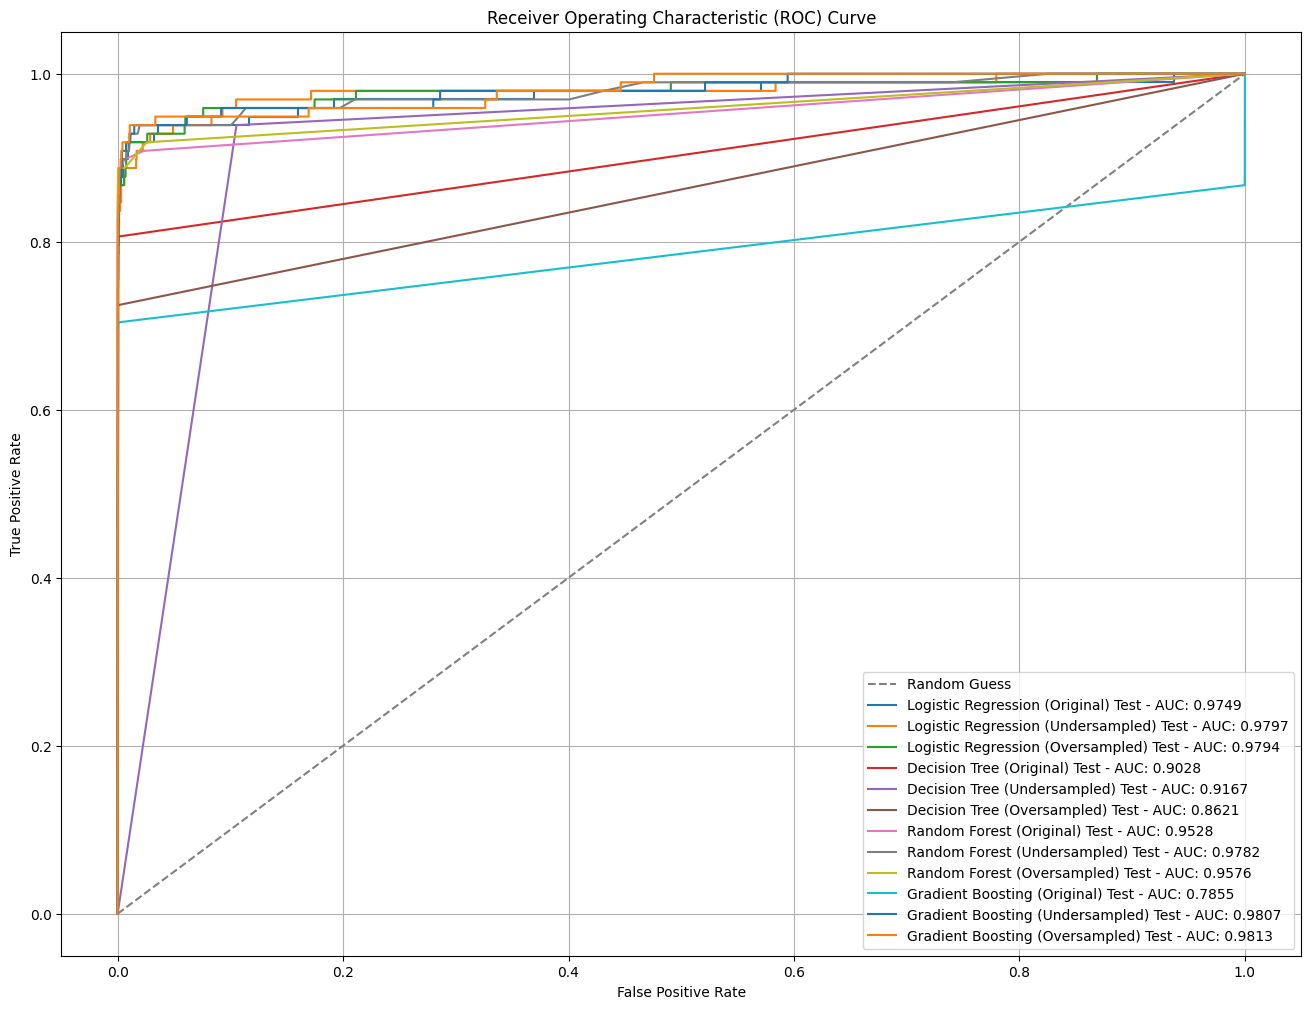

In [ ]:
plt.figure(figsize=(16, 12))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess', color='gray')

plt.plot(fpr_lr_test, tpr_lr_test, label=f'Logistic Regression (Original) Test - AUC: {auc_lr_test:.4f}')
plt.plot(fpr_lr_resampled_test, tpr_lr_resampled_test, label=f'Logistic Regression (Undersampled) Test - AUC: {auc_lr_resampled_test:.4f}')
plt.plot(fpr_lr_oversampled_test, tpr_lr_oversampled_test, label=f'Logistic Regression (Oversampled) Test - AUC: {auc_lr_oversampled_test:.4f}')

plt.plot(fpr_dt_test, tpr_dt_test, label=f'Decision Tree (Original) Test - AUC: {auc_dt_test:.4f}')
plt.plot(fpr_dt_resampled_test, tpr_dt_resampled_test, label=f'Decision Tree (Undersampled) Test - AUC: {auc_dt_resampled_test:.4f}')
plt.plot(fpr_dt_oversampled_test, tpr_dt_oversampled_test, label=f'Decision Tree (Oversampled) Test - AUC: {auc_dt_oversampled_test:.4f}')

plt.plot(fpr_rf_test, tpr_rf_test, label=f'Random Forest (Original) Test - AUC: {auc_rf_test:.4f}')
plt.plot(fpr_rf_resampled_test, tpr_rf_resampled_test, label=f'Random Forest (Undersampled) Test - AUC: {auc_rf_resampled_test:.4f}')
plt.plot(fpr_rf_oversampled_test, tpr_rf_oversampled_test, label=f'Random Forest (Oversampled) Test - AUC: {auc_rf_oversampled_test:.4f}')

plt.plot(fpr_gb_test, tpr_gb_test, label=f'Gradient Boosting (Original) Test - AUC: {auc_gb_test:.4f}')
plt.plot(fpr_gb_resampled_test, tpr_gb_resampled_test, label=f'Gradient Boosting (Undersampled) Test - AUC: {auc_gb_resampled_test:.4f}')
plt.plot(fpr_gb_oversampled_test, tpr_gb_oversampled_test, label=f'Gradient Boosting (Oversampled) Test - AUC: {auc_gb_oversampled_test:.4f}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

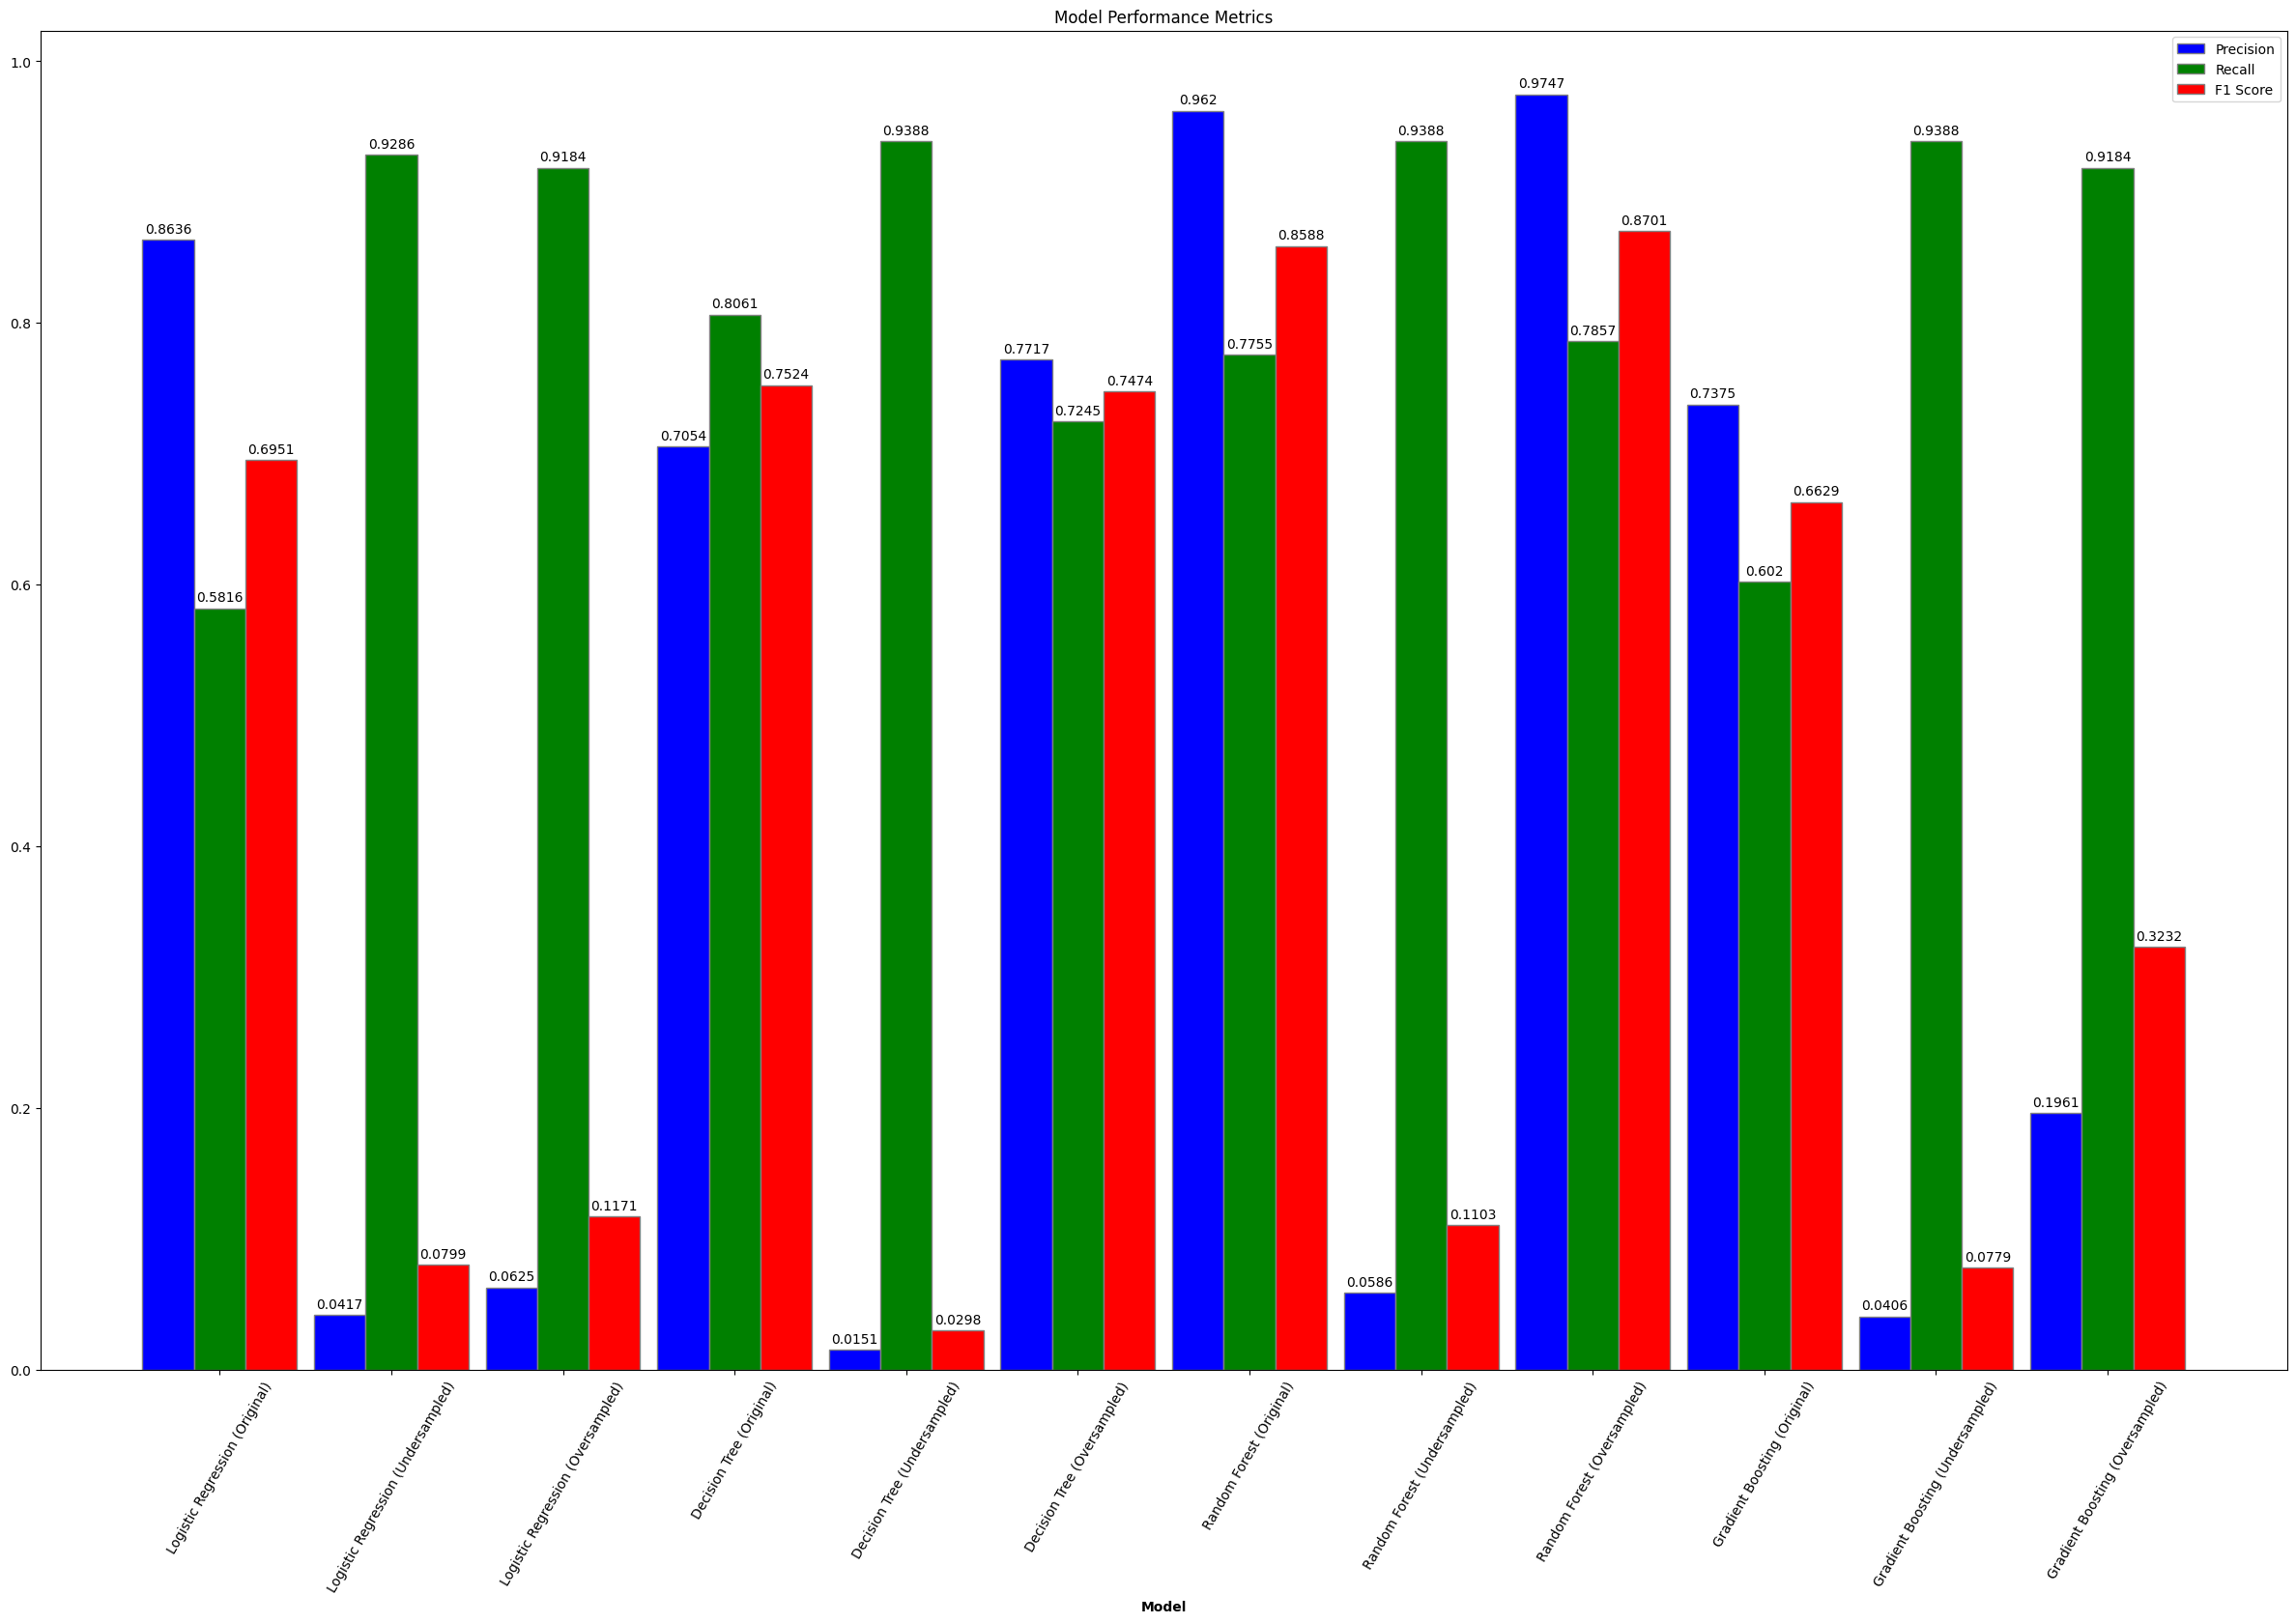

In [ ]:
models = [
          'Logistic Regression (Original)', 'Logistic Regression (Undersampled)', 'Logistic Regression (Oversampled)',
          'Decision Tree (Original)', 'Decision Tree (Undersampled)', 'Decision Tree (Oversampled)',
          'Random Forest (Original)', 'Random Forest (Undersampled)', 'Random Forest (Oversampled)',
          'Gradient Boosting (Original)', 'Gradient Boosting (Undersampled)', 'Gradient Boosting (Oversampled)'
          ]
precision_scores = [precision_lr, precision_lr_resampled, precision_lr_oversampled,
                    precision_dt, precision_dt_resampled, precision_dt_oversampled,
                    precision_rf, precision_rf_resampled, precision_rf_oversampled,
                    precision_gb, precision_gb_resampled, precision_gb_oversampled
                    ]
recall_scores = [recall_lr, recall_lr_resampled, recall_lr_oversampled,
                 recall_dt, recall_dt_resampled, recall_dt_oversampled,
                 recall_rf, recall_rf_resampled, recall_rf_oversampled,
                 recall_gb, recall_gb_resampled, recall_gb_oversampled
                 ]
f1_scores = [f1_lr, f1_lr_resampled, f1_lr_oversampled,
             f1_dt, f1_dt_resampled, f1_dt_oversampled,
             f1_rf, f1_rf_resampled, f1_rf_oversampled,
             f1_gb, f1_gb_resampled, f1_gb_oversampled
             ]

scores_df = pd.DataFrame({'Model': models,
                          'Precision': precision_scores,
                          'Recall': recall_scores,
                          'F1 Score': f1_scores})

# Plot the scores using a bar graph
fig, ax = plt.subplots(figsize=(30, 18))

# Define bar width
bar_width = 0.3

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot bars for precision, recall, and F1 score
precision_bar = plt.bar(r1, scores_df['Precision'], color='b', width=bar_width, edgecolor='grey', label='Precision')
recall_bar = plt.bar(r2, scores_df['Recall'], color='g', width=bar_width, edgecolor='grey', label='Recall')
f1_bar = plt.bar(r3, scores_df['F1 Score'], color='r', width=bar_width, edgecolor='grey', label='F1 Score')

def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(precision_bar)
add_value_labels(recall_bar)
add_value_labels(f1_bar)

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.xticks(rotation=60)


# Add legend
plt.legend()

# Show plot
plt.title('Model Performance Metrics')
plt.show()

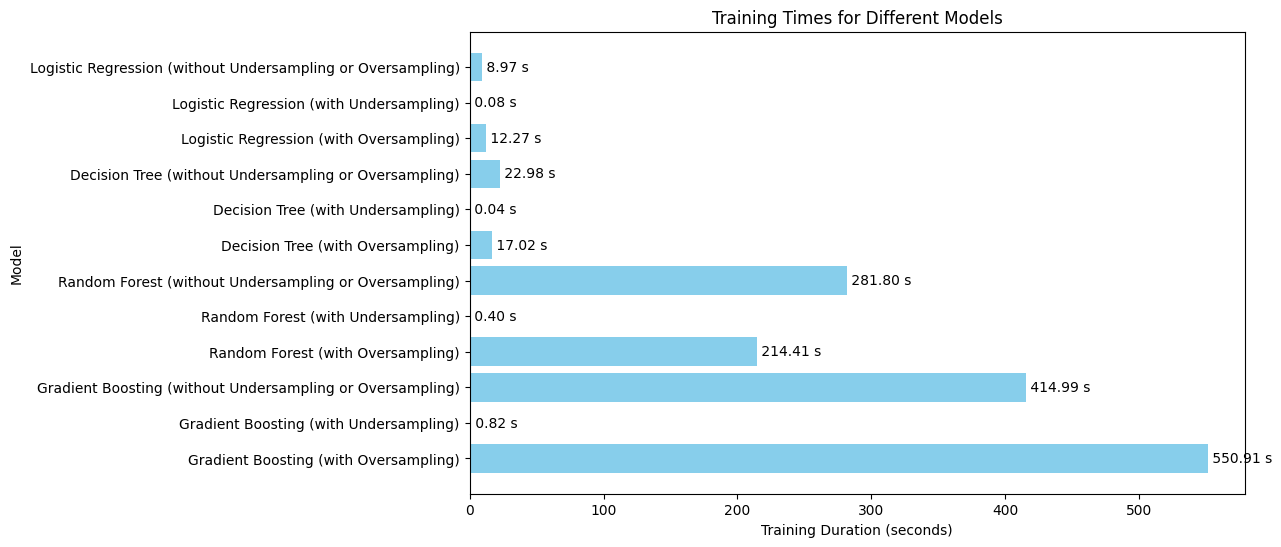

Logistic Regression (without Undersampling or Oversampling): Training duration 8.97 seconds
Logistic Regression (with Undersampling): Training duration 0.08 seconds
Logistic Regression (with Oversampling): Training duration 12.27 seconds
Decision Tree (without Undersampling or Oversampling): Training duration 22.98 seconds
Decision Tree (with Undersampling): Training duration 0.04 seconds
Decision Tree (with Oversampling): Training duration 17.02 seconds
Random Forest (without Undersampling or Oversampling): Training duration 281.80 seconds
Random Forest (with Undersampling): Training duration 0.40 seconds
Random Forest (with Oversampling): Training duration 214.41 seconds
Gradient Boosting (without Undersampling or Oversampling): Training duration 414.99 seconds
Gradient Boosting (with Undersampling): Training duration 0.82 seconds
Gradient Boosting (with Oversampling): Training duration 550.91 seconds


In [ ]:
model_names = list(training_time.keys())
durations = list(training_time.values())

# Plot training times as a bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, durations, color='skyblue')
plt.xlabel('Training Duration (seconds)')
plt.ylabel('Model')
plt.title('Training Times for Different Models')

for bar, duration in zip(bars, durations):
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, f' {duration:.2f} s', ha='left', va='center')

plt.gca().invert_yaxis()  # Invert y-axis to display models from top to bottom
plt.show()

for model_name, duration in training_time.items():
    print(f"{model_name}: Training duration {duration:.2f} seconds")

# Dimensionality Reduction

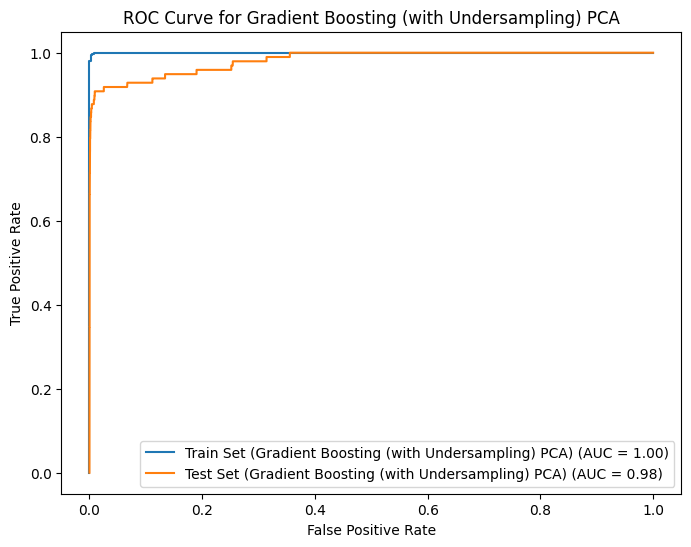

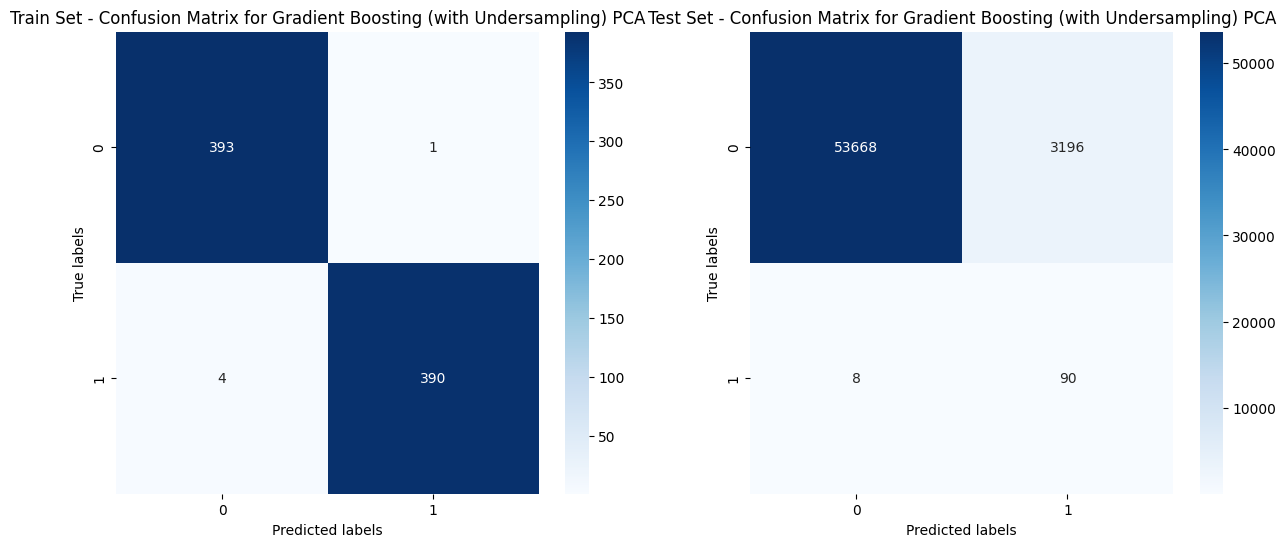

Gradient Boosting (with Undersampling) PCA
Gradient Boosting (with Undersampling) PCA Precision: 0.0274, Recall: 0.9184, F1-score: 0.0532


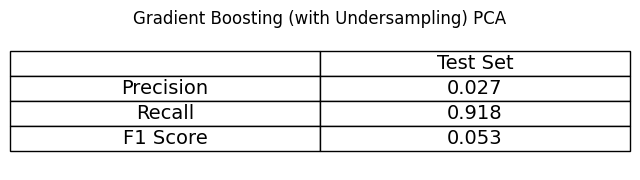

PCA model shape: (788, 10)


In [ ]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_scaled)

best_model_pca = GradientBoostingClassifier()
start_time = time()
best_model_pca.fit(X_train_pca, y_train_resampled)
end_time = time()

training_time["Gradient Boosting (with Undersampling) PCA"] = end_time - start_time


y_pred_best_model_pca_train = best_model_pca.predict_proba(X_train_pca)[:, 1]
fpr_best_model_pca_train, tpr_best_model_pca_train, _ = roc_curve(y_train_resampled, y_pred_best_model_pca_train)
auc_best_model_pca_train = auc(fpr_best_model_pca_train, tpr_best_model_pca_train)

y_pred_best_model_pca_test = best_model_pca.predict_proba(X_test_pca)[:, 1]
fpr_best_model_pca_test, tpr_best_model_pca_test, _ = roc_curve(y_test, y_pred_best_model_pca_test)
auc_best_model_pca_test = auc(fpr_best_model_pca_test, tpr_best_model_pca_test)

plot_roc_curve(fpr_best_model_pca_train, tpr_best_model_pca_train, auc_best_model_pca_train, fpr_best_model_pca_test, tpr_best_model_pca_test, auc_best_model_pca_test, 'Gradient Boosting (with Undersampling) PCA')
plot_confusion_matrix_custom(best_model_pca, X_train_pca, y_train_resampled, X_test_pca, y_test, 'Gradient Boosting (with Undersampling) PCA')

print("Gradient Boosting (with Undersampling) PCA")
# print_metrics(y_train_resampled, y_pred_best_model_pca_train, "Train Set -")
precision_best_model_pca, recall_best_model_pca, f1_best_model_pca = print_metrics(y_test, y_pred_best_model_pca_test, "Gradient Boosting (with Undersampling) PCA")
print(f"PCA model shape: {X_train_pca.shape}")

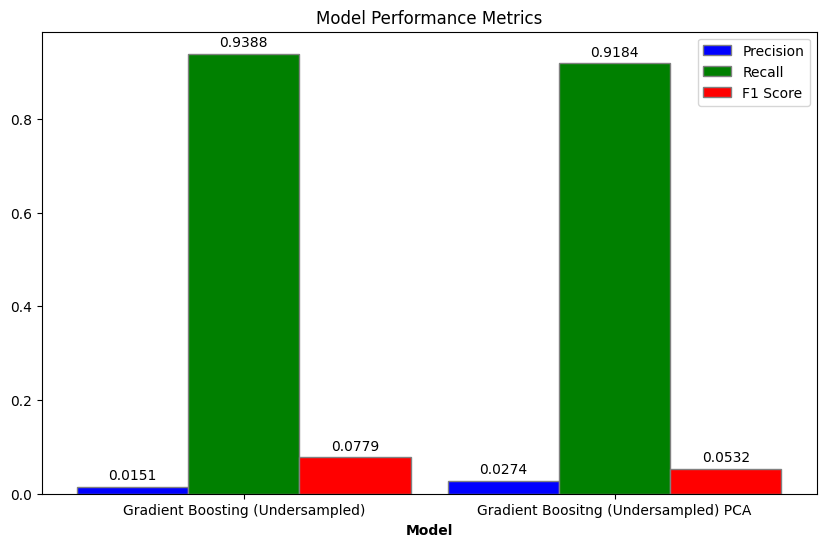

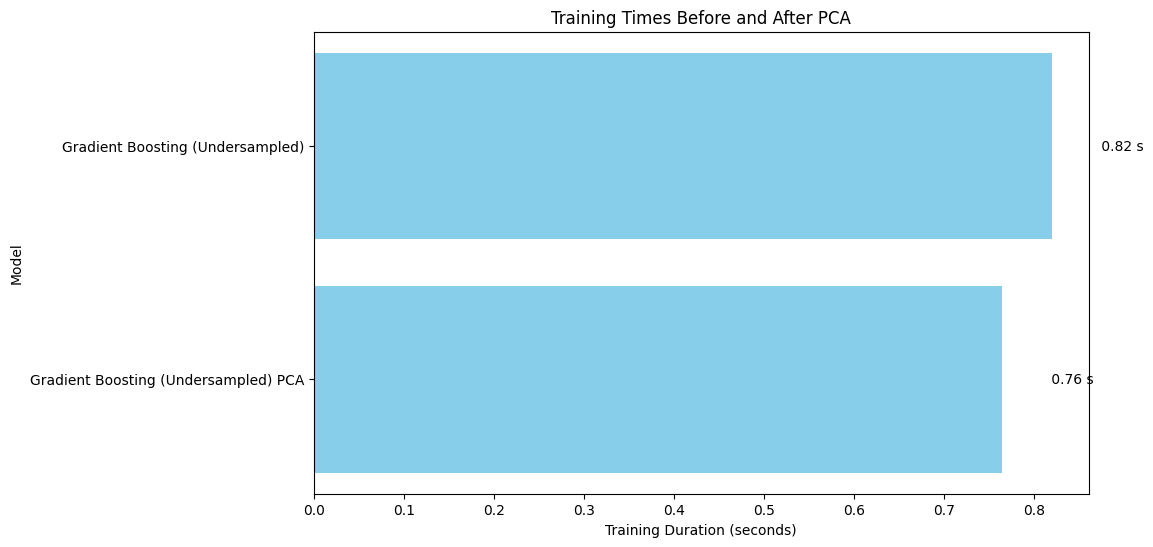

In [ ]:
models = [
          'Gradient Boosting (Undersampled)',
          'Gradient Boositng (Undersampled) PCA'
          ]
precision_scores = [precision_dt_resampled, precision_best_model_pca]
recall_scores = [recall_gb_resampled, recall_best_model_pca]
f1_scores = [f1_gb_resampled, f1_best_model_pca]

scores_df = pd.DataFrame({'Model': models,
                          'Precision': precision_scores,
                          'Recall': recall_scores,
                          'F1 Score': f1_scores})

# Plot the scores using a bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width
bar_width = 0.3

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot bars for precision, recall, and F1 score
precision_bar = plt.bar(r1, scores_df['Precision'], color='b', width=bar_width, edgecolor='grey', label='Precision')
recall_bar = plt.bar(r2, scores_df['Recall'], color='g', width=bar_width, edgecolor='grey', label='Recall')
f1_bar = plt.bar(r3, scores_df['F1 Score'], color='r', width=bar_width, edgecolor='grey', label='F1 Score')

def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(precision_bar)
add_value_labels(recall_bar)
add_value_labels(f1_bar)

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.xticks(rotation=0)


# Add legend
plt.legend()

# Show plot
plt.title('Model Performance Metrics')
plt.show()

interested_models = ['Gradient Boosting (Undersampled)', 'Gradient Boosting (Undersampled) PCA']
interested_training_times = [training_time['Gradient Boosting (with Undersampling)'], training_time['Gradient Boosting (with Undersampling) PCA']]

# Plot training times as a bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(interested_models, interested_training_times, color='skyblue')
plt.xlabel('Training Duration (seconds)')
plt.ylabel('Model')
plt.title('Training Times Before and After PCA')

for bar, duration in zip(bars, interested_training_times):
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, f' {duration:.2f} s', ha='left', va='center')

plt.gca().invert_yaxis()  # Invert y-axis to display models from top to bottom
plt.show()